# F1 Win Prediction Project - Exploratory Data Analysis
#### Alex Boardman - BrainStation

## Table of Contents

1. [**Introduction**](#1)
    - Project Description
    - Data Description
2. [**Acquiring and Loading Data**](#2)
	- Importing Libraries and Notebook Setup
    - Loading Data
    - Basic Data Exploration
    - Areas to Fix
3. [**Basic Data Proprocessing & Cleaning**](#3)
4. [**Data Analysis**](#4)
5. [**Conclusion**](#5)
    - Insights
    - Suggestions
    - Possible Next Steps
6. [**Epilogue**](#6) 
    - References
    - Versioning

---

# 1

### Introduction

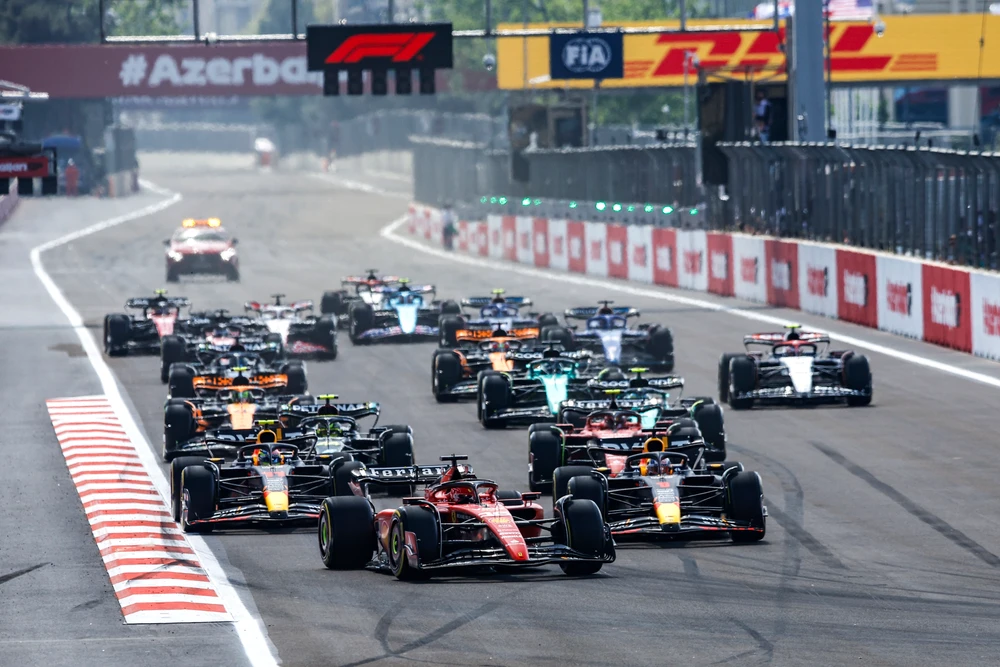## 

### **Project Description** 

**Goal/Purpose:** 

This executive overview outlines a project focused on leveraging data science & machine learning to predict Formula 1 race outcomes, targeting the intricate blend of sports analytics and data science. By analysing datasets including historical race data, the initiative aims to refine prediction accuracy and address the challenges of incomplete data and the unpredictable nature of racing. The project could serve Formula 1 teams, sports analysts, the $235 billion global sports betting market, and fans by offering enhanced predictive insights for race strategy optimization, betting odds formulation, and fan engagement. Utilizing data sources from F1, and Ergast F1 (via Kaggle), the project aims to integrate performance metrics, team and driver information, and contextual race details, to offer a comprehensive approach to predicting and understanding Formula 1 race outcomes.
<p>&nbsp;</p>

### **Questions to be Answered:**

- **Can Machine Learning & Data Science Improve Race Outcome Predictions?**

How can machine learning models utilize extensive datasets, including historical race data, driver and constructor standings, weather conditions, and qualifying times, to predict Formula 1 race outcomes more accurately than traditional methods?
- **What Factors Most Influence Race Outcomes?**

Among the myriad of factors such as team strategies, driver performance, car development, weather conditions, and circuit characteristics, which have the most significant impact on predicting the outcomes of races?


<p>&nbsp;</p>

### **Assumptions/Methodology/Scope:** 

**Assumptions:**

- The dataset represents a comprehensive history of Formula 1 races and includes all relevant factors that could influence race outcomes.
- Missing data are random and not indicative of any systematic bias.
- The performance metrics from the dataset (e.g., qualifying times, pit stop efficiency) are reliable indicators of race performance and outcomes.

**EDA Methodology:**
The project employs a robust exploratory data analysis (EDA) to uncover underlying patterns and relationships within the data. Our methodology includes:

- **Basic Data Exploration & Understanding**: This step aims to gain a familiarity with the data by examining its structure, content, and potential issues.
- **Data Cleaning**: This step involves identifying and correcting errors, inconsistencies, and missing values in the data to ensure its reliability and accuracy for further analysis.
- **Univariate Analysis**: This step focuses on individual variables within the data, analyzing their distribution, central tendency, and dispersion to understand their characteristics.
- **Bivariate Analysis**: This step examines the relationship between two variables to identify correlations, patterns, and potential dependencies that might influence the outcome of interest.
- **Conclusions**: This step summarizes the key findings and insights obtained from the data exploration process, highlighting important patterns, potential limitations, and areas for further investigation.

**Scope:**
- The scope of the project is limited to predicting winning outcomes of Formula 1 races based on historical data up to the current year.
- The project focuses solely on data-driven approaches and does not account for unquantifiable elements such as driver psychology or team dynamics beyond what the data can illustrate.
- The findings are intended to support Formula 1 teams, betting companies, and fans by providing insights into the likelihood of race outcomes and do not constitute definitive predictions.
- The scope includes reviewing data from the past to the present day but does not extend to forecasting beyond the latest complete season.

By clearly defining our assumptions, methodology, and scope, we set the stage for a systematic EDA process that strives to make the most of the data at hand while acknowledging the limitations and boundaries of our analysis.

<p>&nbsp;</p>

### **Data Description**

**Content:** 

This dataset is an excel file of 11235 rows which contains data about F1 race performances (on a driver level) from 1995-2023. 

<p>&nbsp;</p>

**Description of Attributes:** 

Here you can describe what each column represents.

| #   | Column                                              | Description                                                                                                         | Dtype  |
|-----|-----------------------------------------------------|---------------------------------------------------------------------------------------------------------------------|--------|
| 0   | `Index`                                             | A unique identifier for each row in the dataset                                                                     | int64  |
| 1   | `resultId`                                          | A unique identifier for each race result                                                                            | int64  |
| 2   | `raceId`                                            | A unique identifier for each race event                                                                             | int64  |
| 3   | `year`                                              | The year in which the race took place                                                                               | int64  |
| 4   | `race`                                              | The name of the race event                                                                                          | object |
| 5   | `country`                                           | The country where the race event was held                                                                           | object |
| 6   | `nationality_of_circuit`                            | The nationality of the circuit where the race took place                                                            | object |
| 7   | `driverId`                                          | A unique identifier for each driver                                                                                 | int64  |
| 8   | `number`                                            | The racing number of the driver                                                                                     | int64  |
| 9   | `driver_name`                                       | The name of the driver participating in the race                                                                    | object |
| 10  | `F2_champion`                                       | Indicator of whether the driver was a Formula 2 champion                                                            | object |
| 11  | `Former_F1_World_Champion`                          | Indicator of whether the driver is a former Formula 1 World Champion (nullable field)                               | object |
| 12  | `Nationality`                                       | The nationality of the driver                                                                                       | object |
| 13  | `home_race`                                         | Indicator of whether the race is a home race for the driver (binary flag)                                           | int64  |
| 14  | `constructorId`                                     | A unique identifier for the constructor/team                                                                        | int64  |
| 15  | `constructor`                                       | The name of the constructor/team                                                                                    | object |
| 16  | `engine_manufacturer`                               | The name of the company that manufactured the engine for the team                                                   | object |
| 17  | `constructor_nationality`                           | The nationality of the constructor/team                                                                             | object |
| 18  | `number.1`                                          | Possibly a duplicate of the driver's racing number (requires clarification)                                         | int64  |
| 19  | `starting_grid_position`                            | The position on the starting grid where the driver began the race                                                   | int64  |
| 20  | `positionOrder`                                     | The final position in which the driver finished the race                                                            | int64  |
| 21  | `points`                                            | The number of points the driver earned for their finishing position                                                 | float64|
| 22  | `points_in_previous_race`                           | The number of points the driver had in the previous race (all null values)                                          | float64|
| 23  | `laps`                                              | The number of laps the driver completed in the race                                                                 | int64  |
| 24  | `laps_completed_in_previous_races`                  | The total number of laps the driver has completed in previous races (all null values)                               | float64|
| 25  | `time`                                              | The total time the driver took to complete the race                                                                 | object |
| 26  | `milliseconds`                                      | The total time the driver took to complete the race in milliseconds                                                 | object |
| 27  | `fastestLap_ms`                                     | The fastest lap time by the driver during the race in milliseconds                                                  | object |
| 28  | `fastest_lap_from_last_race`                        | The fastest lap time by the driver from the last race (all null values)                                             | float64|
| 29  | `number_of_pit_stops`                               | The number of times the driver pitted during the race                                                               | int64  |
| 30  | `average_time_lost_in_pits`                        | The average time lost during pit stops in the race                                                                                  | float64 |
| 31  | `statusId`                                         | Unique identifier for the status of the driver at the end of the race.                                                              | int64   |
| 32  | `status`                                           | Descriptive name corresponding to the statusId, e.g., 'Finished', 'Retired', etc.                                                   | object  |
| 33  | `status_finished_last_race`                        | Indicates the finishing status of the driver from their last race | float64 |
| 34  | `major_regulation_change`                          | Binary or categorical variable indicating whether a major regulation change occurred in the current season. | int64   |
| 35  | `team_rank_first_race_after_major_regulation_change` | The rank of the driver's team in the first race after a major regulation change.                             | float64 |
| 36  | `team_development_rank_last_year`                  | Ranking of the team based on its development progress in the previous year. | float64 |

<p>&nbsp;</p>

**Acknowledgements:** 

This dataset was found from Kaggle and from scraping the formula1.com [website](https://www.formula1.com/en/results.html). More information about this can be found in the **Data Collection** notebook of this project.

---

# 2

## Acquiring and Loading Data
### Importing Libraries and Notebook Setup

In [45]:
# Install libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Loading Dataset

In [46]:
race_predictor_df = pd.read_excel('C:/Users/Alex/OneDrive/BrainStation/Data_Science_Bootcamp/Capstone_Project/capstone-Aboard89/data/f1_data_capstone_v1.xlsx')

### Basic Data Exploration

In [47]:
# # Show rows and columns count
print(f"Rows count: {race_predictor_df.shape[0]}\nColumns count: {race_predictor_df.shape[1]}")

Rows count: 11235
Columns count: 37


Now we are starting basic data exploration on our DataFrame named `race_predictor_df`. Using the `shape` attribute of the DataFrame, we can see there are 11235 rows and 37 columns respectively.

In [48]:
race_predictor_df.head()

,Index,resultId,raceId,year,race,country,nationality_of_circuit,driverId,number,driver_name,...,fastestLap_ms,fastest_lap_from_last_race,number_of_pit_stops,average_time_lost_in_pits,statusId,status,status_finished_last_race,major_regulation_change,team_rank_first_race_after_major_regulation_change,team_development_rank_last_year
0,1,4721,240,1995,Brazilian Grand Prix,brazil,Brazilian,30,1,Michael Schumacher,...,81009,NaN,3,31.83,1,Finished,NaN,0,NaN,NaN
1,1,4722,240,1995,Brazilian Grand Prix,brazil,Brazilian,14,6,David Coulthard,...,82005,NaN,1,34.17,1,Finished,NaN,0,NaN,NaN
2,1,4723,240,1995,Brazilian Grand Prix,brazil,Brazilian,77,28,Gerhard Berger,...,83007,NaN,2,38.94,11,+1 Lap,NaN,0,NaN,NaN
3,1,4725,240,1995,Brazilian Grand Prix,brazil,Brazilian,55,27,Jean Alesi,...,83002,NaN,2,35.50,11,+1 Lap,NaN,0,NaN,NaN
4,1,4726,240,1995,Brazilian Grand Prix,brazil,Brazilian,87,7,Mark Blundell,...,83003,NaN,2,37.53,11,+1 Lap,NaN,0,NaN,NaN


In [49]:
race_predictor_df.tail()

,Index,resultId,raceId,year,race,country,nationality_of_circuit,driverId,number,driver_name,...,fastestLap_ms,fastest_lap_from_last_race,number_of_pit_stops,average_time_lost_in_pits,statusId,status,status_finished_last_race,major_regulation_change,team_rank_first_race_after_major_regulation_change,team_development_rank_last_year
11230,527,26080,1110,2023,Belgian Grand Prix,belgium,Belgian,825,20,Kevin Magnussen,...,111000,NaN,2,23.61,1,Finished,NaN,0,NaN,NaN
11231,527,26081,1110,2023,Belgian Grand Prix,belgium,Belgian,817,3,Daniel Ricciardo,...,111000,NaN,2,23.07,1,Finished,NaN,0,NaN,NaN
11232,527,26082,1110,2023,Belgian Grand Prix,belgium,Belgian,858,2,Logan Sargeant,...,110005,NaN,3,23.54,1,Finished,NaN,0,NaN,NaN
11233,527,26084,1110,2023,Belgian Grand Prix,belgium,Belgian,832,55,Carlos Sainz,...,113001,NaN,1,23.30,130,Collision damage,NaN,0,NaN,NaN
11234,527,26085,1110,2023,Belgian Grand Prix,belgium,Belgian,857,81,Oscar Piastri,...,Not Found,NaN,0,0.00,130,Collision damage,NaN,0,NaN,NaN


The `race_predictor_df.head()` and `race_predictor_df.tail()` tables present the top and bottom entries of a dataset concerning Formula 1 race outcomes. 

- The dataset appears to span from 1995 to 2023 (although the full) and includes various features such as race ID, year, race name, driver information, and performance metrics like fastest laps and pit stops. 
- Notably, there are missing values (represented as `NaN`) in several columns, including **'fastest lap from last race'**, **'team rank first race after major regulation change'**, and **'team development rank last year'**. This indicates that the dataset has incomplete records in these areas. 
- The data also contains results-related information, such as the race outcome ('Finished', 'Differential', 'Collision damage'), and details about regulation changes, which may be helpful for predicting future race results. 
- The presence of 'Not Found' entries for the **'fastestLap_ms'** field suggests missing or unrecorded lap times. 

Overall, the dataset provides a comprehensive historical account of Formula 1 races that could be used to forecast race outcomes using machine learning models.

#### Check Data Types

In [50]:
# # Show data types
race_predictor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11235 entries, 0 to 11234
Data columns (total 37 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Index                                               11235 non-null  int64  
 1   resultId                                            11235 non-null  int64  
 2   raceId                                              11235 non-null  int64  
 3   year                                                11235 non-null  int64  
 4   race                                                11235 non-null  object 
 5   country                                             11235 non-null  object 
 6   nationality_of_circuit                              11235 non-null  object 
 7   driverId                                            11235 non-null  int64  
 8   number                                              11235 non-null  int64  


There are a total of 37 columns.
- **Integer columns (int64)** are 15 in total.They seem to have a complete set of 11235 non-null values, indicating no missing values and likely a full set of records.
- **Float columns (float64)** are 8 in total. The columns also seem to have no missing values but watch out for zeroes that might represent missing or placeholder values.
- **Object columns (string or mixed types)** are 14 in total. These include categorical variables and text strings. The column `Former_F1_World_Champion` notably has many missing values (only 2537 non-null out of 11235), which suggests that not all drivers in the dataset become world champions.

The dataset has 11235 entries, suggesting that for most columns, data is complete. However, some columns, like `Former_F1_World_Champion`. `status_finished_last_race`, `points_in_previous_race`, etc., have missing values, indicated by a non-null count lower than the total entry count.
The memory usage is 3.2+ MB.

#### Check Missing Data

In [51]:
# # Print percentage of missing values

missing_percent = race_predictor_df.isna().mean().sort_values(ascending=False)
print('---- Percentage of Missing Values (%) -----')
if missing_percent.sum():
    print(missing_percent[missing_percent > 0] * 100)
else:
    print('None')

---- Percentage of Missing Values (%) -----
team_development_rank_last_year                       100.000000
status_finished_last_race                             100.000000
points_in_previous_race                               100.000000
laps_completed_in_previous_races                      100.000000
fastest_lap_from_last_race                            100.000000
team_rank_first_race_after_major_regulation_change    100.000000
Former_F1_World_Champion                               77.418781
dtype: float64


The table displayed above is a summary of missing data within the **race_predictor_df** DataFrame, showing the percentage of missing values for each column. 

- Several columns, such as `team_development_rank_last_year`, `status_finished_last_race`, `points_in_previous_race`, `laps_completed_in_previous_races`, `fastest_lap_from_last_race`, `team_rank_first_race_after_major_regulation_change`, and `Former_F1_World_Champion` have a high percentage of missing values, with some up to 100%, indicating that they are completely missing data across all entries. 
- The `Former_F1_World_Champion` column has missing data in approximately 77.41% of its entries. 

This information is crucial for data cleaning and preparation before any further analysis or machine learning, as it highlights the need for addressing these missing values either by imputation, deletion, or acquiring more complete data.


#### Check for Duplicate Rows

In [52]:
# # Show number of duplicated rows
print(f"No. of entirely duplicated rows: {race_predictor_df.duplicated().sum()}")

# # Show duplicated rows
race_predictor_df[race_predictor_df.duplicated()]

No. of entirely duplicated rows: 0


,Index,resultId,raceId,year,race,country,nationality_of_circuit,driverId,number,driver_name,...,fastestLap_ms,fastest_lap_from_last_race,number_of_pit_stops,average_time_lost_in_pits,statusId,status,status_finished_last_race,major_regulation_change,team_rank_first_race_after_major_regulation_change,team_development_rank_last_year


Checking for duplicate rows in our DataFrame **race_predictor_df**. It performs two steps:

1. **Checks for the number of duplicates:** It uses the `.duplicated()` method to identify all rows that are entirely identical to another row in the DataFrame. The `.sum()` method then counts the number of these duplicates, and the output (`No. of entirely duplicated rows: 0`) indicates there are **no** rows that are completely identical in this DataFrame.

2. **Shows the duplicate rows:** Although there are no **entirely** duplicated rows, the second line attempts to display any rows that were marked as duplicates by the `.duplicated()` method. Since there are none, the output is an empty DataFrame, meaning there are no partially or entirely duplicate rows in **race_predictor_df**


#### Check Uniqueness of Data

In [53]:
# # Print the percentage similarity of values (the lower %, the better)
num_unique = race_predictor_df.nunique().sort_values()
print('---- Percentage Similarity of Values (%) -----')
print(100/num_unique)

---- Percentage Similarity of Values (%) -----
team_development_rank_last_year                             inf
team_rank_first_race_after_major_regulation_change          inf
laps_completed_in_previous_races                            inf
fastest_lap_from_last_race                                  inf
points_in_previous_race                                     inf
status_finished_last_race                                   inf
home_race                                             50.000000
major_regulation_change                               50.000000
number_of_pit_stops                                   14.285714
Former_F1_World_Champion                              10.000000
constructor_nationality                                7.142857
engine_manufacturer                                    4.761905
F2_champion                                            4.347826
positionOrder                                          3.846154
starting_grid_position                                 3.

The chart illustrates the percentage similarity of values within each column of the **race_predictor_df** DataFrame, which assesses the uniqueness of the data by calculating the inverse of the proportion of unique entries. Columns with `inf` (infinity) suggest a division by zero, indicating that these columns may have all unique values or no data at all. Columns like `home_race` and `major_regulation_change` have high similarity percentages, indicating less uniqueness and a higher repetition of values. On the contrary, columns at the bottom of the list, such as `raceId`, `Index`, `fastestLap_ms`, and `resultId`, show very low percentages, reflecting a high level of uniqueness — these columns likely contain identifiers or time-based data with a wide range of values. This understanding of data uniqueness is essential for feature selection, as columns with high similarity might carry less discriminative information for predictive modeling, whereas highly unique columns might be identifiers or carry significant unique information per entry.

#### Check Data Range

In [54]:
# # Print summary statistics
race_predictor_df.describe(include='all').T
# skim(race_predictor_df)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Index,11235.0,NaN,NaN,NaN,259.636938,151.45306,1.0,127.0,262.0,388.0,527.0
resultId,11235.0,NaN,NaN,NaN,13313.263017,10307.887281,1.0,2809.5,20462.0,23272.5,26085.0
raceId,11235.0,NaN,NaN,NaN,535.897107,419.741753,1.0,136.0,342.0,964.0,1110.0
year,11235.0,NaN,NaN,NaN,2009.244148,8.232487,1995.0,2002.0,2010.0,2016.0,2023.0
race,11235,43,Spanish Grand Prix,621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,11235,35,great-britain,639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nationality_of_circuit,11235,32,Italian,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
driverId,11235.0,NaN,NaN,NaN,279.776947,368.937558,1.0,16.0,44.0,815.0,858.0
number,11235.0,NaN,NaN,NaN,17.213974,16.986888,1.0,7.0,14.0,21.0,99.0
driver_name,11235,153,Fernando Alonso,370,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The `describe()` method output provides summary statistics for the `race_predictor_df` DataFrame, which includes count, unique, top, freq, mean, std, min, 25%, 50%, 75%, and max for each column. This table is a critical starting point for exploratory data analysis, helping to understand the distribution of data, identify potential data quality issues, and inform preprocessing steps such as handling missing values or outlier detection.

- Numeric columns like `year`, `number`, `number_of_pit_stops`, `average_time_lost_in_pits`, `statusId`, and `major_regulation_change` provide statistical measures such as mean and standard deviation, indicating the central tendency and dispersion of values. 
- Columns with non-numeric data, such as `race`, `country`, and `driver_name`, show the count of unique values, the most frequent value (`top`), and how often it appears (`freq`). 
- Several columns have a count of 0 for unique values, indicating they may be completely empty or not applicable for the unique count



Here are some insights from the data:

- The dataset spans from the `year` **1995 to 2023**, showcasing **28 years** of F1 racing data.
- The mean value for the `number_of_pit_stops` is very close to 1 with a maximum of 6, hinting at a strategic element in racing where pit stops are minimal.
- The status `Finished` is the most common final status, which could imply a high rate of race completions among participants.
- **Range of Results**: The result IDs and driver IDs have a broad range, indicating a large dataset that likely spans many events and participants.
- **Circuit Nationality Diversity**: The dataset includes data on circuits of different nationalities (32 unique), highlighting the international scope of the races covered.
- **Inconsistent Data**: The presence of entries like "Not Found" under 'fastest_lap_from_last_race' suggests there are missing or inconsistent records that may need cleaning or imputation before analysis.
- Driver Performance: The fastest lap time appears to be a significant variable, with a mean of around 279 seconds and a standard deviation of approximately 368 seconds, indicating wide variability in driver performance.
- Time Analysis: The `average_time_lost_in_pits` could be an important factor in understanding the overall race strategy and its impact on race outcomes, if we are trying to predict race win during a race.
- **Finishing Status**: The `status` column tells us that 'Finished' is the most frequent status, but without more context, it's unclear what proportion of the total statuses this represents, which would be critical for understanding completion rates.
- **Potential Outliers**: The maximum values for some variables like `points` seem to be significantly higher than the 75th percentile, suggesting the presence of outliers or exceptional cases that may be of interest for further investigation.



---

# 3

## Basic Data Preprocessing/Cleaning

### Handling Missing Values

Here are the columns with missing values: 

team_development_rank_last_year                       100.000000
status_finished_last_race                             100.000000
points_in_previous_race                               100.000000
laps_completed_in_previous_races                      100.000000
fastest_lap_from_last_race                            100.000000
team_rank_first_race_after_major_regulation_change    100.000000
Former_F1_World_Champion                               77.418781



#### 1)  Drop columns for Feature Engineering (see F1_preprocessing notebook): 

We didn't have data after the Data Collection stage for the columns below. I will drop these columns and give them as ideas for Feature Engineering

1) team_development_rank_last_year, 
2) status_finished_last_race
3) team_rank_first_race_after_major_regulation_change

In [55]:
# Dropping specified columns from the DataFrame
race_predictor_df = race_predictor_df.drop(['team_development_rank_last_year', 
                                            'status_finished_last_race', 
                                            'team_rank_first_race_after_major_regulation_change'], 
                                           axis=1)


#### 2) Former_F1_World_Champion

In [56]:
# Former_F1_World_Champion column

# Convert the "F2_champion" column into a binary column: 1 if there's a name, 0 if the cell is already 0
race_predictor_df['Former_F1_World_Champion'] = race_predictor_df['Former_F1_World_Champion'].apply(lambda x: 0 if pd.isnull(x) else 1)

In [57]:
race_predictor_df['Former_F1_World_Champion']

0        1
1        0
2        0
3        0
4        0
        ..
11230    0
11231    0
11232    0
11233    0
11234    0
Name: Former_F1_World_Champion, Length: 11235, dtype: int64

Cleaned the values to show this as 1 or 0

In [58]:
race_predictor_df.head()

,Index,resultId,raceId,year,race,country,nationality_of_circuit,driverId,number,driver_name,...,laps_completed_in_previous_races,time,milliseconds,fastestLap_ms,fastest_lap_from_last_race,number_of_pit_stops,average_time_lost_in_pits,statusId,status,major_regulation_change
0,1,4721,240,1995,Brazilian Grand Prix,brazil,Brazilian,30,1,Michael Schumacher,...,NaN,01:38:34.154000,5914154,81009,NaN,3,31.83,1,Finished,0
1,1,4722,240,1995,Brazilian Grand Prix,brazil,Brazilian,14,6,David Coulthard,...,NaN,11.06,5925214,82005,NaN,1,34.17,1,Finished,0
2,1,4723,240,1995,Brazilian Grand Prix,brazil,Brazilian,77,28,Gerhard Berger,...,NaN,\N,\N,83007,NaN,2,38.94,11,+1 Lap,0
3,1,4725,240,1995,Brazilian Grand Prix,brazil,Brazilian,55,27,Jean Alesi,...,NaN,\N,\N,83002,NaN,2,35.50,11,+1 Lap,0
4,1,4726,240,1995,Brazilian Grand Prix,brazil,Brazilian,87,7,Mark Blundell,...,NaN,\N,\N,83003,NaN,2,37.53,11,+1 Lap,0


In [59]:
sorted_race_predictor_df = race_predictor_df.sort_values(by='Index', ascending=True)

In [60]:
sorted_race_predictor_df.head()

,Index,resultId,raceId,year,race,country,nationality_of_circuit,driverId,number,driver_name,...,laps_completed_in_previous_races,time,milliseconds,fastestLap_ms,fastest_lap_from_last_race,number_of_pit_stops,average_time_lost_in_pits,statusId,status,major_regulation_change
0,1,4721,240,1995,Brazilian Grand Prix,brazil,Brazilian,30,1,Michael Schumacher,...,NaN,01:38:34.154000,5914154,81009,NaN,3,31.83,1,Finished,0
25,1,4724,240,1995,Brazilian Grand Prix,brazil,Brazilian,57,8,Mika Häkkinen,...,NaN,\N,\N,Not Found,NaN,0,0.00,11,+1 Lap,0
24,1,4746,240,1995,Brazilian Grand Prix,brazil,Brazilian,94,23,Pierluigi Martini,...,NaN,\N,\N,Not Found,NaN,0,0.00,6,Gearbox,0
23,1,4745,240,1995,Brazilian Grand Prix,brazil,Brazilian,44,26,Olivier Panis,...,NaN,\N,\N,Not Found,NaN,0,0.00,4,Collision,0
22,1,4744,240,1995,Brazilian Grand Prix,brazil,Brazilian,49,30,Heinz-Harald Frentzen,...,NaN,\N,\N,84001,NaN,0,0.00,10,Electrical,0


#### 3) points_in_previous_race

In [61]:
# create copy of sorted_race_predictor_df

points_in_previous_race_df = sorted_race_predictor_df.copy()

In [62]:
# points_in_previous_race column fix

# Initialize the "points_in_previous_race" column with NaN (or you can use 0 if you prefer)
points_in_previous_race_df['points_in_previous_race'] = pd.NA

# Iterate through the DataFrame to fill in "points_in_previous_race"
for index, row in points_in_previous_race_df.iterrows():
    current_index = row['Index']
    driver_name = row['driver_name']
    
    # Find the previous race index for the driver
    previous_race_index = current_index - 1
    
    # Find the row of the previous race for the driver, if it exists
    previous_race_row = points_in_previous_race_df[(points_in_previous_race_df['Index'] == previous_race_index) & (points_in_previous_race_df['driver_name'] == driver_name)]
    
    # If the driver has a previous race, update the points_in_previous_race for the current race
    if not previous_race_row.empty:
        points_in_previous_race_df.at[index, 'points_in_previous_race'] = previous_race_row.iloc[0]['points']

In [63]:
# Check the first few rows to see if "points_in_previous_race" has been updated
points_in_previous_race_df[['Index', 'driver_name', 'points', 'points_in_previous_race']].head(50)

,Index,driver_name,points,points_in_previous_race
0,1,Michael Schumacher,10.0,<NA>
25,1,Mika Häkkinen,3.0,<NA>
24,1,Pierluigi Martini,0.0,<NA>
23,1,Olivier Panis,0.0,<NA>
22,1,Heinz-Harald Frentzen,0.0,<NA>
21,1,Domenico Schiattarella,0.0,<NA>
20,1,Eddie Irvine,0.0,<NA>
19,1,Ukyo Katayama,0.0,<NA>
17,1,Rubens Barrichello,0.0,<NA>
16,1,Bertrand Gachot,0.0,<NA>


That seems to have worked - now we have a column to see how many points the driver won in the last race.

#### 4) laps_completed_in_previous_race

In [64]:
laps_in_previous_race_df = points_in_previous_race_df.copy()

In [65]:
# laps_in_previous_race column fix

# Initialize the "laps_in_previous_race" column with NaN (or you can use 0 if you prefer)
laps_in_previous_race_df['laps_in_previous_race'] = pd.NA

# Iterate through the DataFrame to fill in "laps_in_previous_race"
for index, row in laps_in_previous_race_df.iterrows():
    current_index = row['Index']
    driver_name = row['driver_name']
    
    # Find the previous race index for the driver
    previous_race_index = current_index - 1
    
    # Find the row of the previous race for the driver, if it exists
    previous_race_row = laps_in_previous_race_df[(laps_in_previous_race_df['Index'] == previous_race_index) & (laps_in_previous_race_df['driver_name'] == driver_name)]
    
    # If the driver has a previous race, update the laps_in_previous_race for the current race
    if not previous_race_row.empty:
        laps_in_previous_race_df.at[index, 'laps_in_previous_race'] = previous_race_row.iloc[0]['laps']

In [66]:
# Check the first few rows to see if "points_in_previous_race" has been updated
laps_in_previous_race_df[['Index', 'driver_name', 'laps', 'laps_in_previous_race']].head(50)

,Index,driver_name,laps,laps_in_previous_race
0,1,Michael Schumacher,71,<NA>
25,1,Mika Häkkinen,70,<NA>
24,1,Pierluigi Martini,0,<NA>
23,1,Olivier Panis,0,<NA>
22,1,Heinz-Harald Frentzen,10,<NA>
21,1,Domenico Schiattarella,12,<NA>
20,1,Eddie Irvine,15,<NA>
19,1,Ukyo Katayama,15,<NA>
17,1,Rubens Barrichello,16,<NA>
16,1,Bertrand Gachot,23,<NA>


That seems to have worked - now we have a column to see how many laps the driver raced in the last race.

#### 5) fastest_lap_from_last_race

In [67]:
fastest_lap_df = laps_in_previous_race_df.copy()

In [68]:
# fastest_lap_from_last_race column fix

# Initialize the "fastest_lap_from_last_race" column with NaN (or you can use 0 if you prefer)
fastest_lap_df['fastest_lap_from_last_race'] = pd.NA

# Iterate through the DataFrame to fill in "fastest_lap_from_last_race"
for index, row in fastest_lap_df.iterrows():
    current_index = row['Index']
    driver_name = row['driver_name']
    
    # Find the previous race index for the driver
    previous_race_index = current_index - 1
    
    # Find the row of the previous race for the driver, if it exists
    previous_race_row = fastest_lap_df[(fastest_lap_df['Index'] == previous_race_index) & (fastest_lap_df['driver_name'] == driver_name)]
    
    # If the driver has a previous race, update the fastest_lap_from_last_race for the current race
    if not previous_race_row.empty:
        fastest_lap_df.at[index, 'fastest_lap_from_last_race'] = previous_race_row.iloc[0]['fastestLap_ms']


In [69]:
# Check the first few rows to see if "points_in_previous_race" has been updated
fastest_lap_df[['Index', 'driver_name', 'fastestLap_ms', 'fastest_lap_from_last_race']].head(50)

,Index,driver_name,fastestLap_ms,fastest_lap_from_last_race
0,1,Michael Schumacher,81009,<NA>
25,1,Mika Häkkinen,Not Found,<NA>
24,1,Pierluigi Martini,Not Found,<NA>
23,1,Olivier Panis,Not Found,<NA>
22,1,Heinz-Harald Frentzen,84001,<NA>
21,1,Domenico Schiattarella,88005,<NA>
20,1,Eddie Irvine,83004,<NA>
19,1,Ukyo Katayama,84007,<NA>
17,1,Rubens Barrichello,83003,<NA>
16,1,Bertrand Gachot,87008,<NA>


#### 6) F2_champion

In [70]:
f2_champion_df = fastest_lap_df.copy()

In [71]:
# F2_champion - turn to binary
# Convert the "F2_champion" column into a binary column: 1 if there's a name, 0 if the cell is already 0
f2_champion_df['F2_champion'] = f2_champion_df['F2_champion'].apply(lambda x: 1 if x != 0 else 0)


In [72]:
f2_champion_df['F2_champion']

0        0
25       0
24       0
23       0
22       0
        ..
11216    1
11215    0
11233    0
11223    0
11234    1
Name: F2_champion, Length: 11235, dtype: int64

Cleaned the values to show this as 1 or 0

---

#### 7) Need to create a new binary column for whether the driver won the race or not

In [73]:
race_win_df = f2_champion_df.copy()

In [74]:
# To create a new binary column 'race_win' based on 'positionOrder'
race_win_df['race_win'] = (race_win_df['positionOrder'] == 1).astype(int)

# Display the first few rows to confirm the 'race_win' column is added correctly
print(race_win_df[['positionOrder', 'race_win']].head())


    positionOrder  race_win
0               1         1
25              4         0
24             26         0
23             25         0
22             24         0


In [75]:
# Turn to csv
f2_champion_df.to_csv('f2_champion_df.csv', index=False)

In [76]:
data_analysis_df = race_win_df.copy()

# 4

## **Data Analysis**

#### **Review of the target variable - `race_win`**

In [77]:
# Check the distribution of win vs. not win
data_analysis_df['race_win'].value_counts()/data_analysis_df.shape[0]*100.0

race_win
0    95.309301
1     4.690699
Name: count, dtype: float64

From the output, approximately 95.39% of the instances in the dataset did not result in a race win (`race_win` is 0), while about 4.69% of the instances did result in a win (`race_win` is 1). This indicates a highly imbalanced dataset regarding the target variable `race_win`, which could pose challenges for predictive modeling, as the model might be biased towards predicting the majority class.

#### **Univariate Analysis - Categorical**

As we have so much data in the dataset, I will create some charts to focus on the top 10 items for each categorical item to get more insight into the data

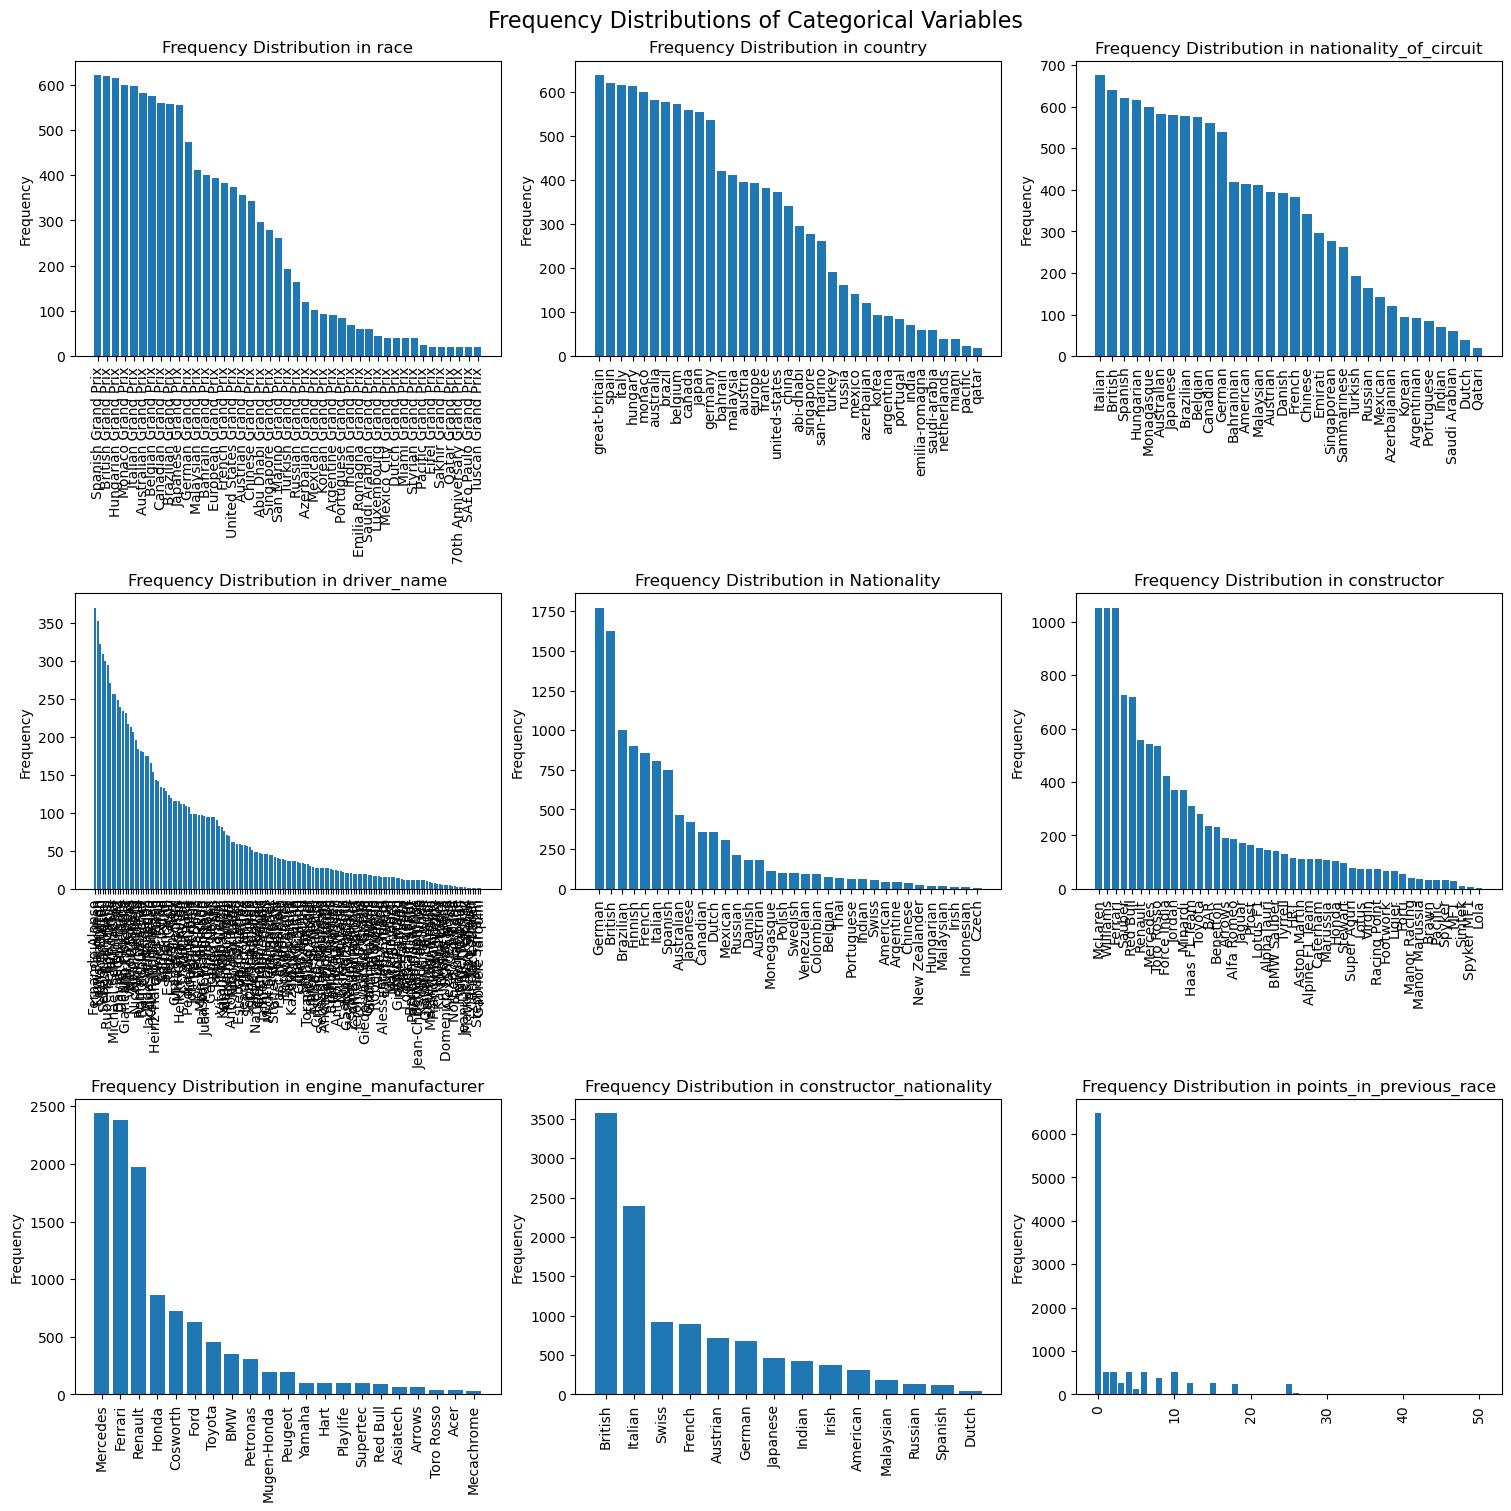

In [93]:
import matplotlib.pyplot as plt

# Identify categorical variables (assumed as object dtype here)
categorical_df = data_analysis_df.select_dtypes(include=['object']).columns

# Limit the number of categorical variables to the first 9 for a 3x3 subplot grid
categorical_df = categorical_df[:9]  # Select only the first 9 categorical variables

ncols = 3  # number of columns in your subplot grid
nrows = 3  # number of rows in your subplot grid (fixed at 3 for a 3x4 grid)

# Create subplots with 3 rows and 3 columns
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*5), constrained_layout=True)
fig.suptitle('Frequency Distributions of Categorical Variables', fontsize=16)

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot the top 10 categories for each of the first 9 categorical variables
for i, var in enumerate(categorical_df):
    # Generate frequency counts for the categorical variable
    counts = data_analysis_df[var].value_counts()
    
    # Plot the bar chart for the top 10 categories
    axes[i].bar(counts.index, counts.values)
    axes[i].set_title(f'Frequency Distribution in {var}')
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Hide any unused subplots if the number of categorical variables is less than 9
for j in range(len(categorical_df), len(axes)):
    axes[j].set_visible(False)

plt.show()




Here's a sentence for each chart that provides insight into how they relate to the challenge of predicting Formula 1 Grand Prix winners:

1. **Frequency distribution in race**: The variation in race frequency could influence predictive models due to differing numbers of historical data points per race.
2. **Frequency distribution in country**: A higher frequency of races in certain countries may offer more data and potentially reveal location-based patterns in race outcomes.
3. **Frequency distribution in nationality of circuit**: The distribution suggests certain circuit nationalities are more common, which could reflect biases in race conditions and local knowledge.
4. **Frequency distribution in driver_name**: The presence of certain drivers, such as Fernando Alonso, more frequently in the dataset indicates experienced drivers may have a higher influence on race outcomes.
5. **Frequency distribution in Nationality**: The predominance of certain nationalities, like German and British, might reflect a concentration of talent or resources that could be significant predictors.
6. **Frequency distribution in constructor**: A constructor’s frequency in the dataset, especially prevalent ones like McLaren, can be critical in modeling due to their historical performance and technological advances.
7. **Frequency distribution in engine_manufacturer**: The prominence of manufacturers like Mercedes may be indicative of the technological edge that could influence race results.
8. **Frequency distribution in constructor_nationality**: The concentration of British constructors could suggest a potential bias towards specific engineering practices influencing the races.
9. **Frequency distribution in points_in_previous_race**: The high frequency of zero points in the previous race shows the volatility and competitiveness of races, which poses a challenge to predictive accuracy.

Let's dig into the top 10 of each category, as it's quite hard to make everything out in the charts above.

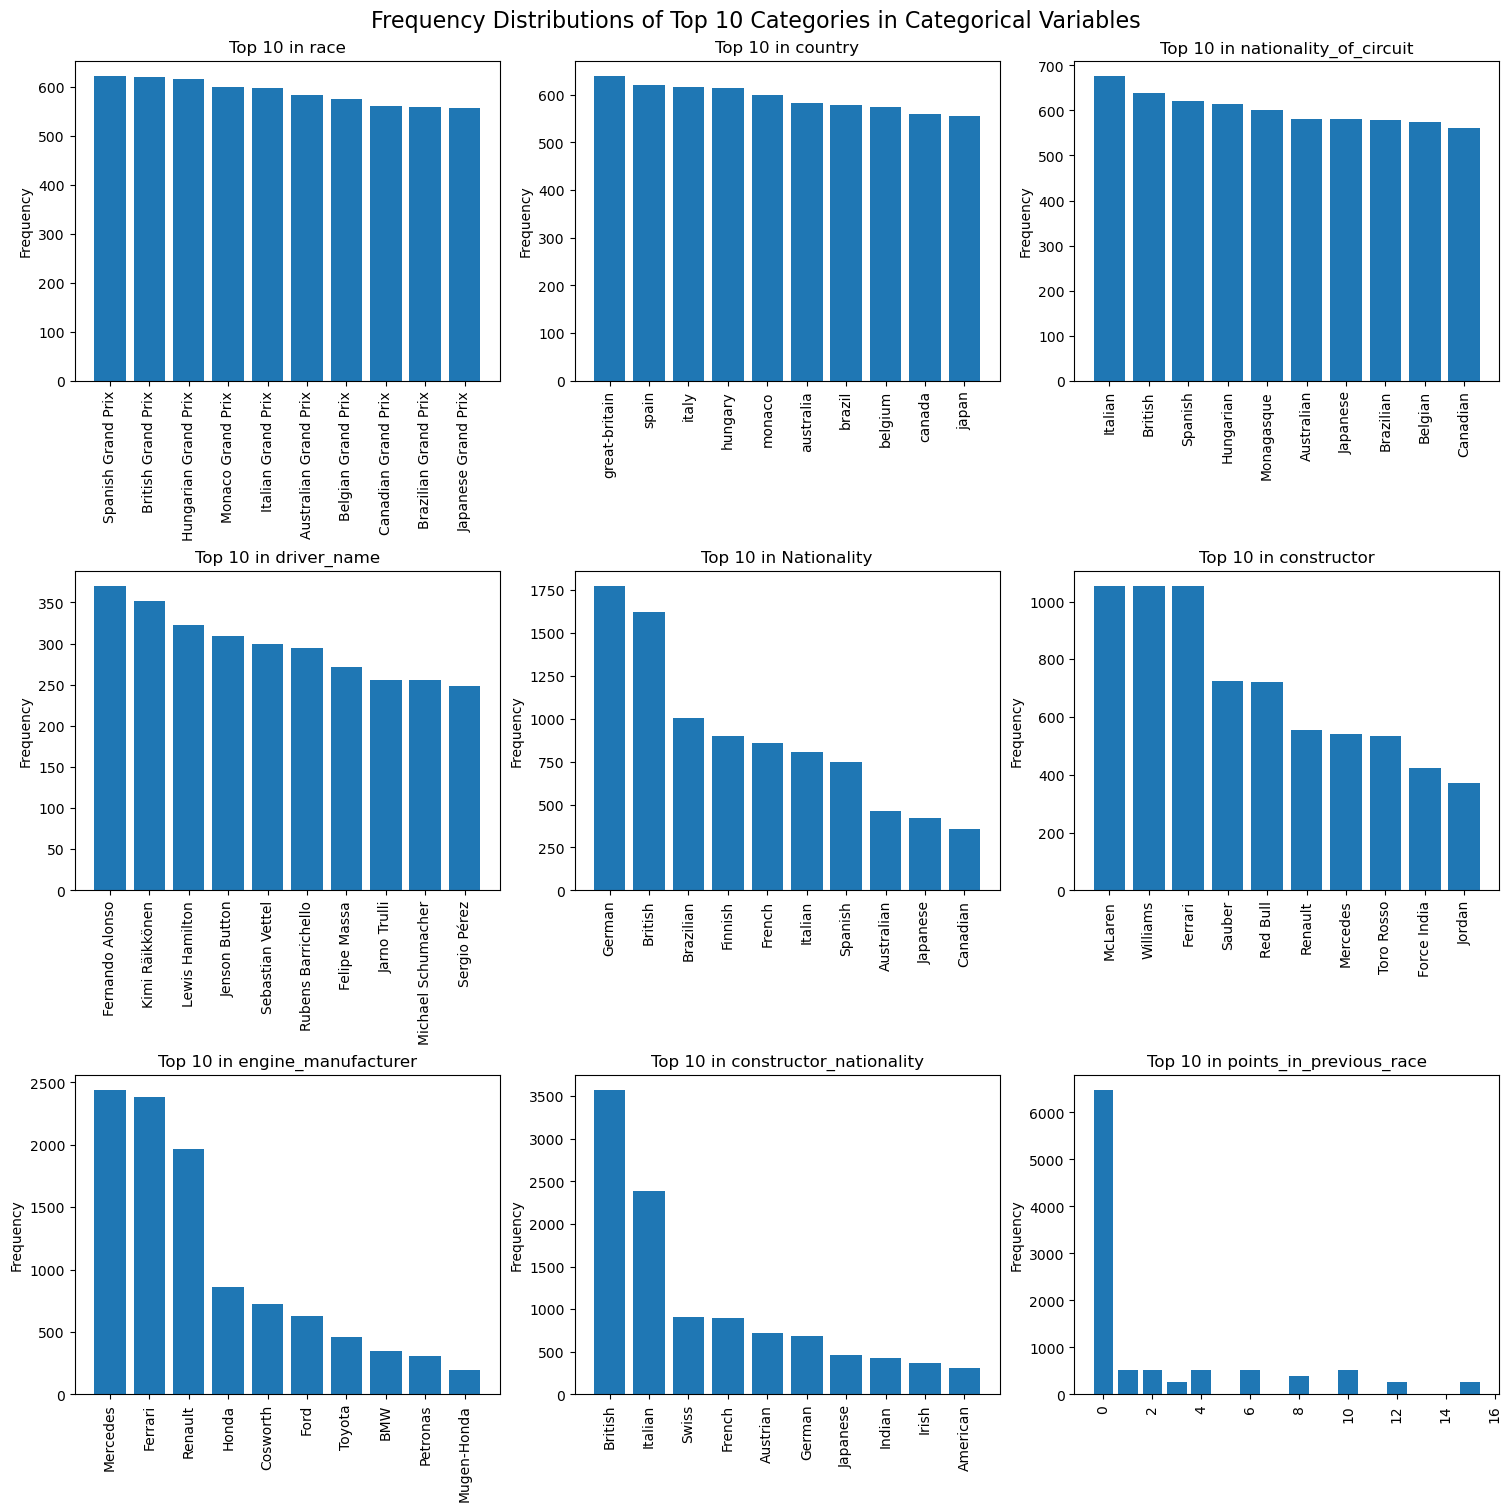

In [78]:
import matplotlib.pyplot as plt

# Identify categorical variables (assumed as object dtype here)
categorical_df = data_analysis_df.select_dtypes(include=['object']).columns

# Limit the number of categorical variables to the first 9 for a 3x3 subplot grid
categorical_df = categorical_df[:9]  # Select only the first 9 categorical variables

ncols = 3  # number of columns in your subplot grid
nrows = 3  # number of rows in your subplot grid (fixed at 3 for a 3x4 grid)

# Create subplots with 3 rows and 3 columns
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*5), constrained_layout=True)
fig.suptitle('Frequency Distributions of Top 10 Categories in Categorical Variables', fontsize=16)

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot the top 10 categories for each of the first 9 categorical variables
for i, var in enumerate(categorical_df):
    # Generate frequency counts for the categorical variable
    counts = data_analysis_df[var].value_counts().head(10)
    
    # Plot the bar chart for the top 10 categories
    axes[i].bar(counts.index, counts.values)
    axes[i].set_title(f'Top 10 in {var}')
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Hide any unused subplots if the number of categorical variables is less than 9
for j in range(len(categorical_df), len(axes)):
    axes[j].set_visible(False)

plt.show()




- **Top 10 in constructor** : The bar chart shows the frequency of occurrences for the top 10 constructors, with McLaren having the highest frequency, surpassing 1000. Williams, Ferrari, and Sauber follow, indicating their significant presence, but each with a notably lower frequency than McLaren, suggesting McLaren's dominance or higher activity within the context measured.

- **Top 10 in Nationality** : The chart illustrates that German and British nationalities are the most prevalent in the dataset, suggesting a significant representation in the racing domain, which may reflect a robust motorsports culture or successful driver development programs in these countries. The subsequent decline in frequency for other nationalities such as Brazilian, Finnish, and French indicates a less dominant, yet still notable, presence in the sport.

- **Top 10 in engine manufacturer** : The chart indicates that Mercedes is the most frequently listed engine manufacturer, which could suggest their dominance or preferred choice in engine supply within the dataset's context. Ferrari follows as the second most common and Renault in third, showing competitive presences, but with a slightly lower frequency compared to Mercedes, highlighting a potential gap in engine supplier representation.

- **Top 10 in constructor nationality** : The chart presents the frequencies of the top 10 constructor nationalities, showing a clear dominance of British constructors with a frequency over 3000. Italian constructors come in second, but with less than half the frequency of the British, highlighting a significant concentration of constructors' nationalities being British or Italian in each row of data.

- **Top 10 in driver_name** : The chart shows Fernando Alonso as the most frequently occurring driver in the top 10 category, indicating his prominence or consistent performance in the dataset. The relatively even distribution among the other top drivers suggests a competitive field with multiple individuals frequently appearing in the dataset.

- **Top 10 in race** :The bar chart displays a very uniform distribution of frequencies among the top 10 races, each with a frequency close to 600, indicating a similar level of occurrences or participation across these events. The Spanish Grand Prix has the highest frequency, marginally surpassing the others, while the Japanese Grand Prix has the lowest within the top 10, albeit not by a substantial margin.

- **Top 10 in points_in_previous_race** The chart indicates a high frequency of occurrences where drivers scored zero points in the previous race, suggesting that not scoring in a race is the most common outcome. The sharp drop-off in frequency for scoring any points highlights that achieving points in races is less common and may reflect the competitive nature of the sport or the scoring system's structure.

- **Top 10 in nationality_of_circuit** The chart illustrates that Italian circuits have the highest frequency, surpassing 650, suggesting they are the most utilized or featured within this dataset. The rest of the nationalities of circuits show a relatively even distribution, all falling between approximately 400 to 600 frequency, indicating a broad international representation in the dataset.

#### **Univariate Analysis - Numeric variables**

Let's repeat the process we did above with the numeric variables:

In [79]:
data_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11235 entries, 0 to 11234
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Index                             11235 non-null  int64  
 1   resultId                          11235 non-null  int64  
 2   raceId                            11235 non-null  int64  
 3   year                              11235 non-null  int64  
 4   race                              11235 non-null  object 
 5   country                           11235 non-null  object 
 6   nationality_of_circuit            11235 non-null  object 
 7   driverId                          11235 non-null  int64  
 8   number                            11235 non-null  int64  
 9   driver_name                       11235 non-null  object 
 10  F2_champion                       11235 non-null  int64  
 11  Former_F1_World_Champion          11235 non-null  int64  
 12  Nationali

In [80]:
# Get only the numeric columns
numeric_df = data_analysis_df.select_dtypes(['int64','float64']).copy()

numeric_df.head()

,Index,resultId,raceId,year,driverId,number,F2_champion,Former_F1_World_Champion,home_race,constructorId,number.1,starting_grid_position,positionOrder,points,laps,laps_completed_in_previous_races,number_of_pit_stops,average_time_lost_in_pits,statusId,major_regulation_change
0,1,4721,240,1995,30,1,0,1,0,22,1,2,1,10.0,71,NaN,3,31.83,1,0
25,1,4724,240,1995,57,8,0,0,0,1,8,7,4,3.0,70,NaN,0,0.00,11,0
24,1,4746,240,1995,94,23,0,0,0,18,23,17,26,0.0,0,NaN,0,0.00,6,0
23,1,4745,240,1995,44,26,0,0,0,27,26,10,25,0.0,0,NaN,0,0.00,4,0
22,1,4744,240,1995,49,30,0,0,0,15,30,14,24,0.0,10,NaN,0,0.00,10,0


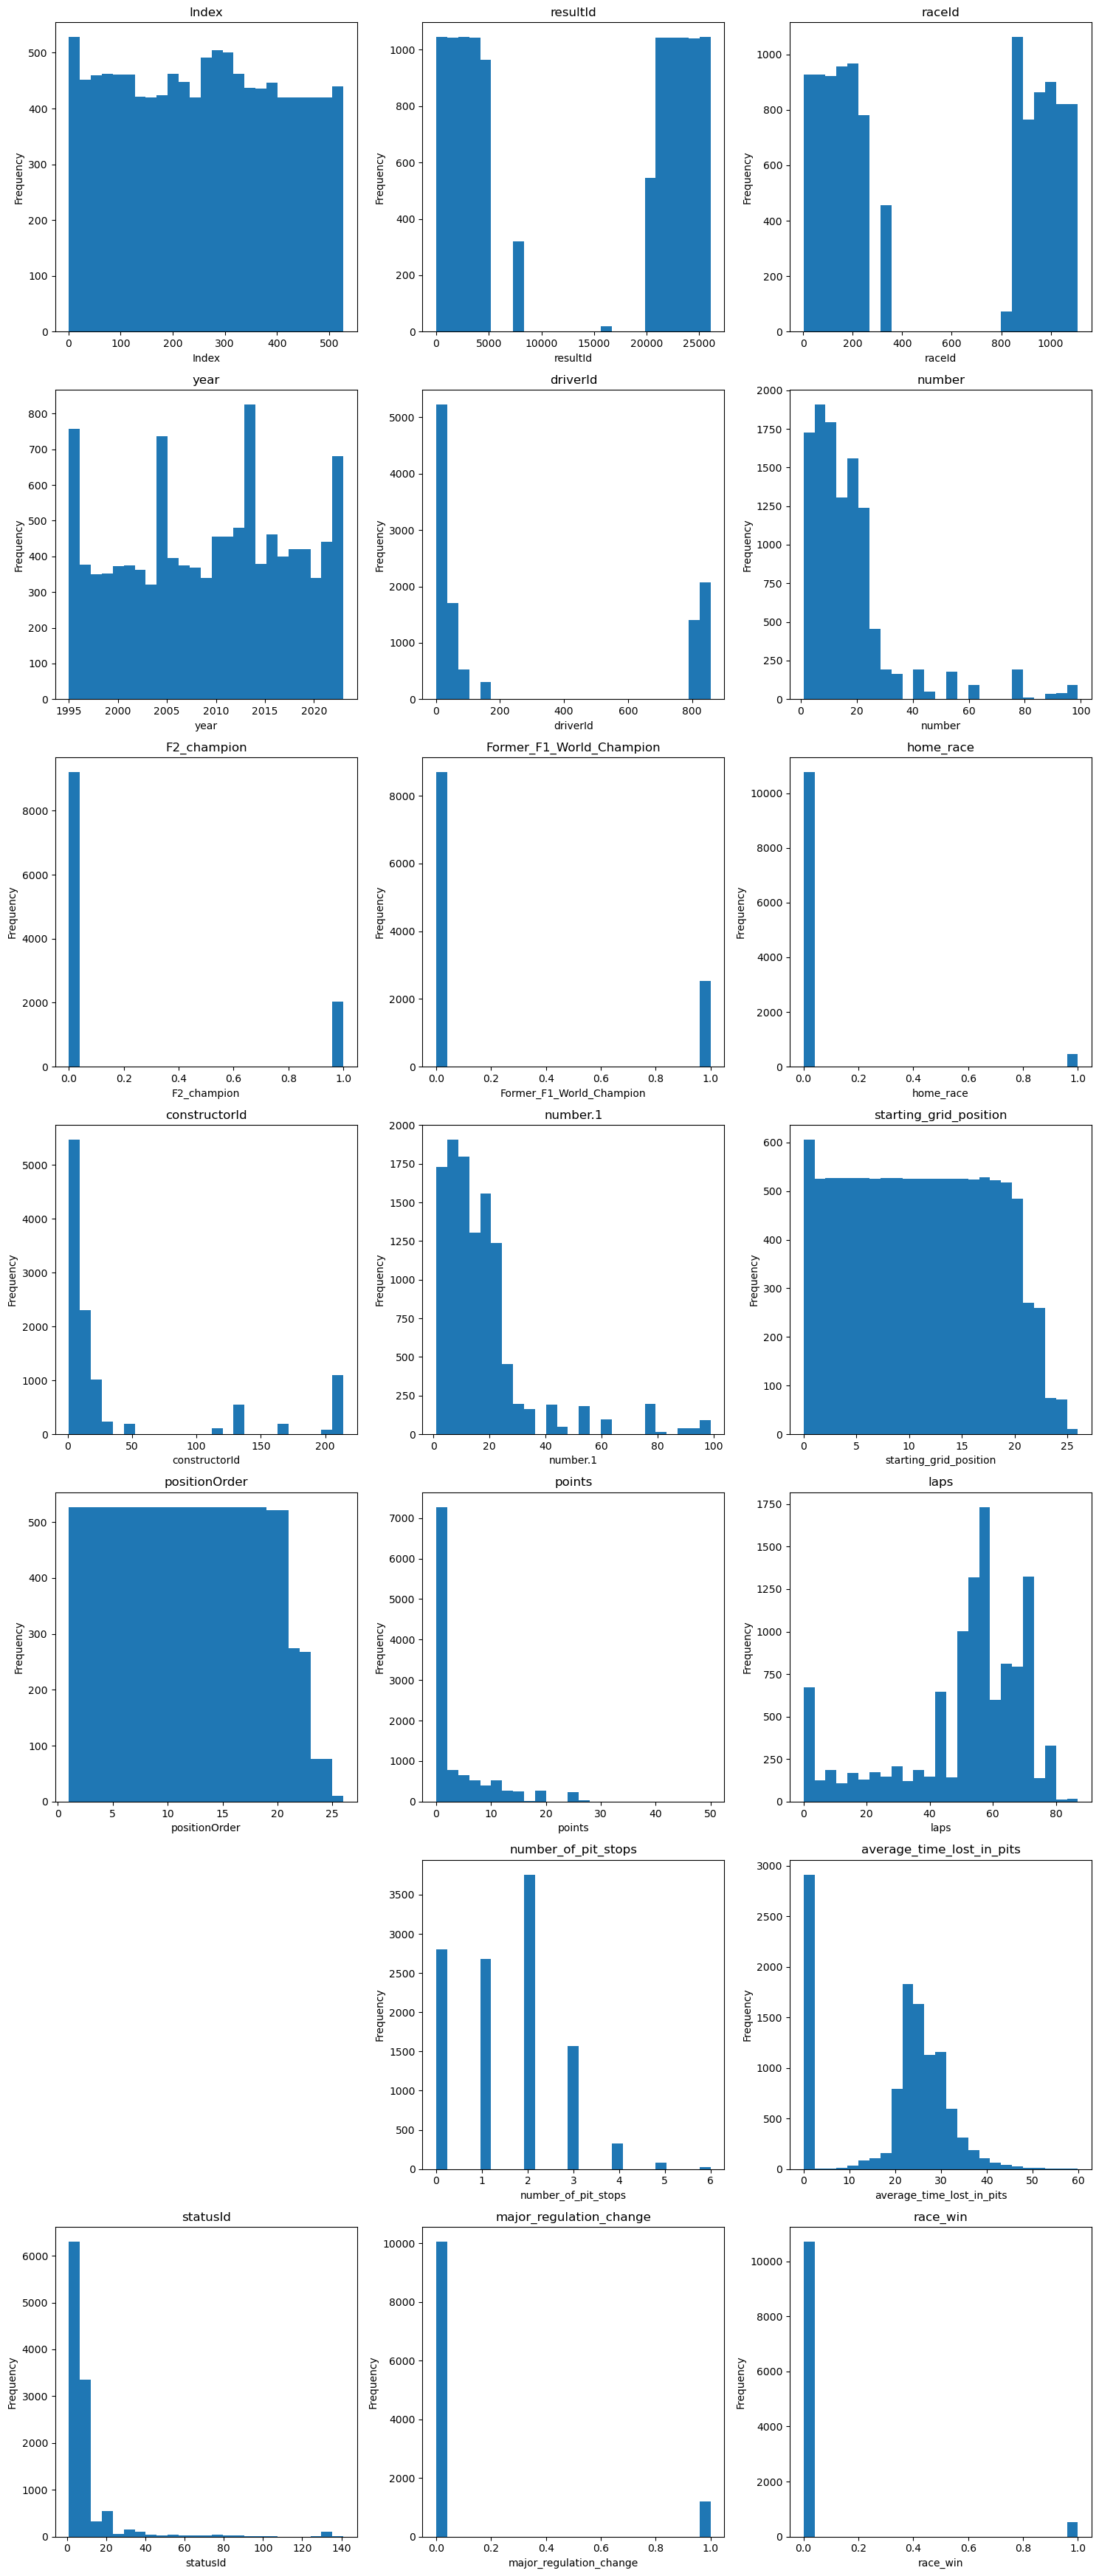

In [96]:
num_columns = len(numeric_df.columns)

ncols = 3
nrows = (num_columns + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 5 * nrows))
axes = axes.flatten()

for i in range(min(num_columns, nrows*ncols)):
    column = numeric_df.columns[i]
    # Check if there are any non-NaN values and the data is numeric
    if numeric_df[column].notna().any() and np.issubdtype(numeric_df[column].dtype, np.number):
        axes[i].hist(numeric_df[column].dropna(), bins=25)
        axes[i].set_title(column)
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
    else:
        axes[i].text(0.5, 0.5, 'Data not available or non-numeric', 
                     horizontalalignment='center', 
                     verticalalignment='center', 
                     transform=axes[i].transAxes)
        axes[i].set_title(column)
        axes[i].set_xlabel(column)
        axes[i].set_visible(False)  # Optionally, make the entire subplot invisible

# Hide any unused subplots if the number of columns is not a multiple of ncols
for j in range(i+1, nrows*ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Here are the insights from each histogram presented in the subplot for the F1 race win prediction data science project:

1. **Index**: The distribution seems relatively uniform, indicating that the dataset entries are spread evenly across the index range.
   
2. **resultId**: There are two peaks in the dataset, which may indicate groups or clusters of results that could be explored for underlying patterns related to race wins.
   
3. **raceId**: Similar to resultId, the raceId histogram shows several peaks. This might suggest that certain races (identified by raceId) have more entries, potentially because of multiple races per year or more detailed data collection in specific events.

4. **year**: The data spans across many years, with noticeable variations in frequency. The peaks might correspond to years with more races held or better data recording practices.

5. **driverId**: There's a high frequency for certain driverIds, which could be indicative of drivers who have participated in many races, hence they may have a higher chance of winning due to experience.

6. **number**: This is likely the racing number of the drivers. The distribution shows that certain numbers are far more common, which might be historical or due to the popularity of specific numbers among racers.

7. **F2_champion**: The data is heavily skewed towards non-champions, with very few F2 champions in the dataset. This could indicate that F2 champions are less common in F1 racing, or their presence does not significantly influence race wins.

8. **Former_F1_World_Champion**: Similar to F2_champions, there are significantly fewer former F1 World Champions than non-champions. This could be an important feature, as being a former champion might correlate with the likelihood of winning races.

9. **home_race**: The histogram shows that most races are not home races for drivers, with a small number of instances where drivers are racing in their home country.

10. **constructorId**: Similar to driverId, the frequency of certain constructorIds suggests that some teams participate more frequently in races, potentially influencing the win rate.

11. **number.1**: This appears to be the same as the 'number' distribution and could be a duplicate column that might need to be removed from the dataset to avoid multicollinearity.

12. **starting_grid_position**: A large number of entries are towards the lower grid positions, indicating that most drivers do not start from pole positions. The distribution of this feature can be crucial, as starting positions can significantly affect race outcomes.

13. **positionOrder**: There's a high frequency of higher position orders, showing that finishing in the top positions (i.e., 1st, 2nd, 3rd) is less common - a key insight for predicting race wins.

14. **points**: Most entries scored low points, with a rapid drop-off as points increase, indicating that higher point scores are rarer, which aligns with the lower frequency of race wins.

15. **laps**: The histogram shows that there is a high frequency of races with a higher number of laps completed, suggesting that most drivers finish the race with many laps, which could be indicative of a higher chance of winning.

Each histogram provides insights that could be leveraged to understand factors that influence race wins in F1. Some variables like 'driverId' and 'constructorId' may represent experience and resources, while variables like 'starting_grid_position' and 'positionOrder' are direct indicators of race performance. Variables with a high imbalance (like 'F2_champion' and 'Former_F1_World_Champion') could significantly impact the model if the minority class has a strong relation to the outcome (race wins).

### **Bivariate Analysis - with respect to `positionOrder` variable.**
Look at the registered variable of interest. We will repeat our analysis over the categorical variables after dividing by the positionOrder column:

In [82]:
# Select only numeric columns for the groupby operation
numeric_columns = data_analysis_df.select_dtypes(include=['number']).columns

# Perform the groupby operation only on numeric columns
grouped_data = data_analysis_df.groupby('positionOrder')[numeric_columns].mean()
grouped_data


,Index,resultId,raceId,year,driverId,number,F2_champion,Former_F1_World_Champion,home_race,constructorId,...,starting_grid_position,positionOrder,points,laps,laps_completed_in_previous_races,number_of_pit_stops,average_time_lost_in_pits,statusId,major_regulation_change,race_win
positionOrder,,,,,,,,,,,,,,,,,,,,,
1,264.000000,13385.259962,541.136622,2009.476281,140.368121,13.516129,0.267552,0.753321,0.045541,35.798861,...,2.354839,1.0,17.784630,61.239089,NaN,1.715370,21.806015,1.000000,0.104364,1.0
2,264.000000,13386.259962,541.136622,2009.476281,172.377609,14.736243,0.227704,0.529412,0.028463,33.007590,...,3.724858,2.0,12.681214,61.235294,NaN,1.624288,21.360740,1.020873,0.089184,0.0
3,264.000000,13387.259962,541.136622,2009.476281,205.421252,14.789374,0.166983,0.409867,0.034156,28.777989,...,5.066414,3.0,10.147059,61.218216,NaN,1.650854,21.016698,1.284630,0.106262,0.0
4,264.000000,13388.259962,541.136622,2009.476281,216.240987,13.502846,0.184061,0.370019,0.043643,24.662239,...,6.343454,4.0,8.118596,61.178368,NaN,1.717268,21.813359,1.671727,0.104364,0.0
5,264.000000,13389.290323,541.136622,2009.476281,242.629981,16.358634,0.172676,0.330171,0.053131,28.165085,...,7.430740,5.0,6.599620,61.104364,NaN,1.662239,21.909374,2.172676,0.096774,0.0
6,264.000000,13390.259962,541.136622,2009.476281,268.768501,15.130930,0.193548,0.239089,0.030361,29.425047,...,8.679317,6.0,5.080645,61.005693,NaN,1.681214,21.669279,3.074004,0.100569,0.0
7,264.000000,13391.259962,541.136622,2009.476281,274.569260,14.045541,0.204934,0.214421,0.043643,36.759013,...,9.633776,7.0,3.559772,60.698292,NaN,1.654649,21.417021,4.225806,0.108159,0.0
8,264.000000,13392.254269,541.136622,2009.476281,298.185958,17.197343,0.178368,0.208729,0.041746,32.738140,...,11.028463,8.0,2.295066,60.531309,NaN,1.629981,21.550171,5.373814,0.100569,0.0
9,264.000000,13393.261860,541.136622,2009.476281,296.791271,16.423150,0.151803,0.157495,0.049336,34.922201,...,11.444023,9.0,1.034156,60.208729,NaN,1.709677,22.437647,6.296015,0.108159,0.0


This table appears to summarize racing statistics by position order. It seems to show averages or some form of aggregation for different racing-related metrics such as race ID, year, driver ID, starting grid position, and various other performance metrics across different race position orders. 

- For instance, it shows that the average starting grid position for first place finishers is around 2.35, and they, on average, complete just over 61 laps with about 1.71 pit stops, while for the second place the average starting position is slightly higher at 3.72, indicating a possible trend that drivers starting nearer the front are more likely to finish in the top positions. 
0 The 'NaN' values in the 'laps_completed_in_previous_races' column suggest missing data for this particular metric.

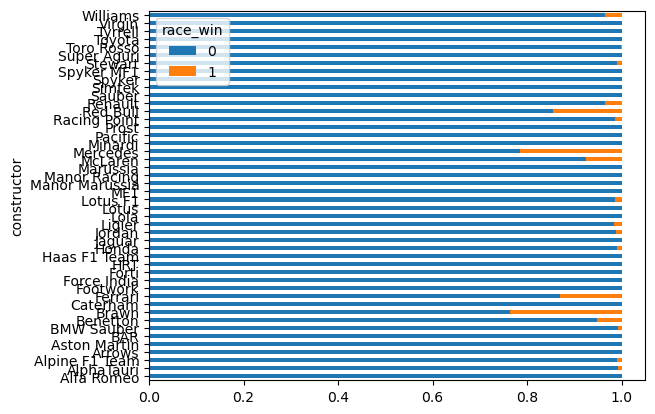

In [83]:
pct_team_df = data_analysis_df.groupby(['constructor', 'race_win'])['constructor'].count()/data_analysis_df.groupby('constructor')['constructor'].count()

pct_team_df.unstack().plot(kind='barh', stacked=True)
plt.show()

This is too hard to read, so I will focus on the top 10 categories

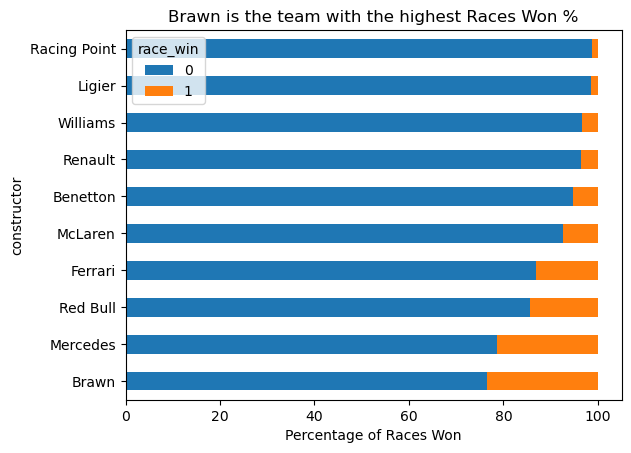

In [84]:
# First, calculate the counts of wins and losses for each constructor
constructor_counts = data_analysis_df.groupby(['constructor'])['race_win'].value_counts().unstack(fill_value=0)

# Next, get the total number of races for each constructor
total_races = data_analysis_df.groupby('constructor')['constructor'].count()

# Calculate the percentage of wins for each constructor
pct_team_df = (constructor_counts.div(total_races, axis=0) * 100).sort_values(by=1, ascending=False)

# Now, plot only the top 10 constructors
top_constructors = pct_team_df.nlargest(10, 1)  # Get the top 10 constructors with the most wins
top_constructors.plot(kind='barh', stacked=True, mark_right=True)
plt.title('Brawn is the team with the highest Races Won %')
plt.xlabel('Percentage of Races Won')

# Display the plot
plt.show()


We will now do this for the rest of the categorical variables against race win

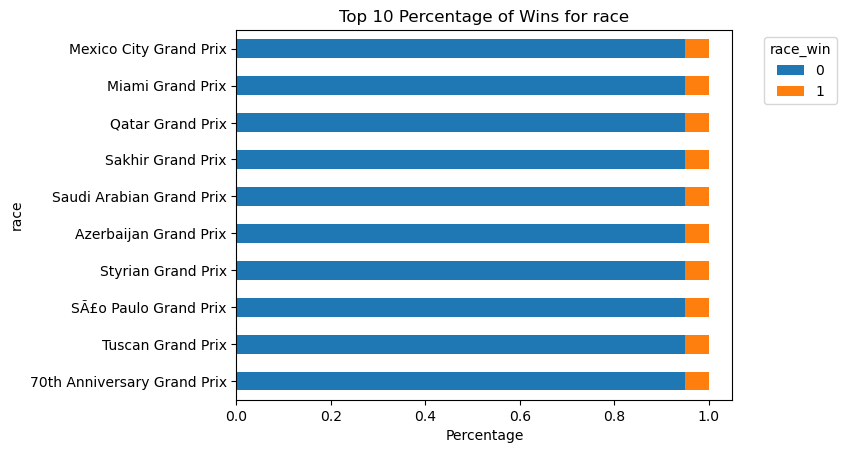

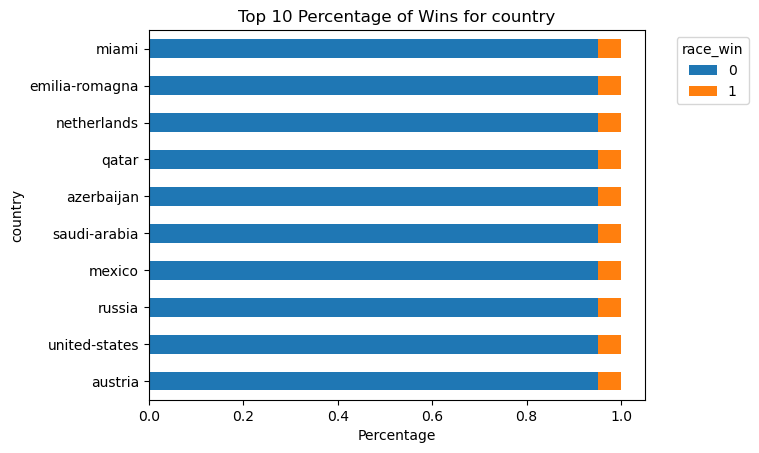

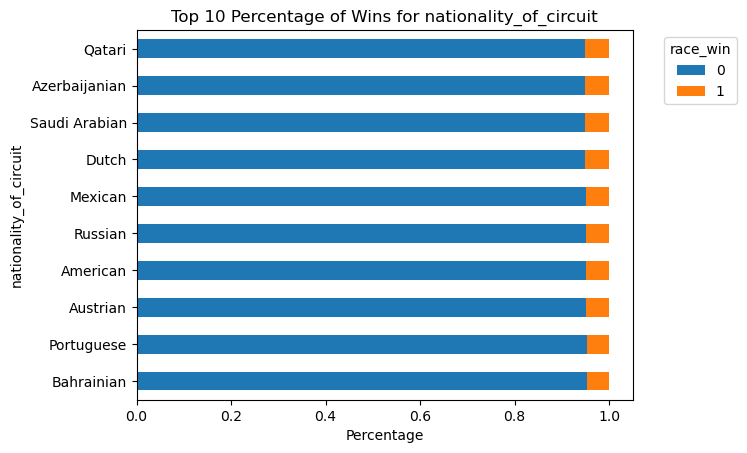

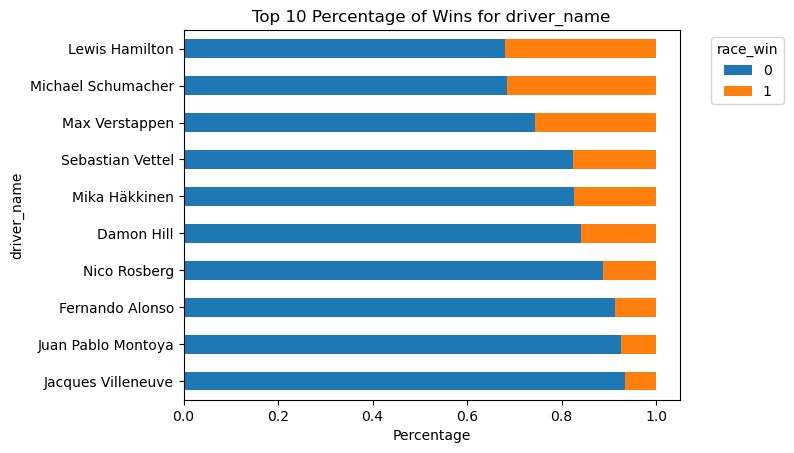

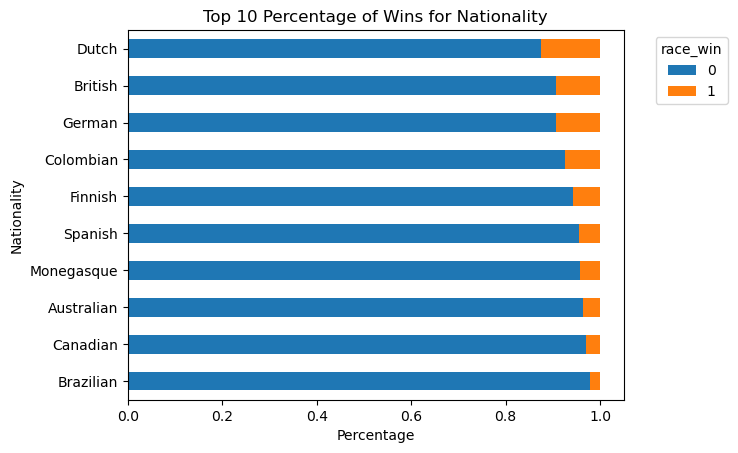

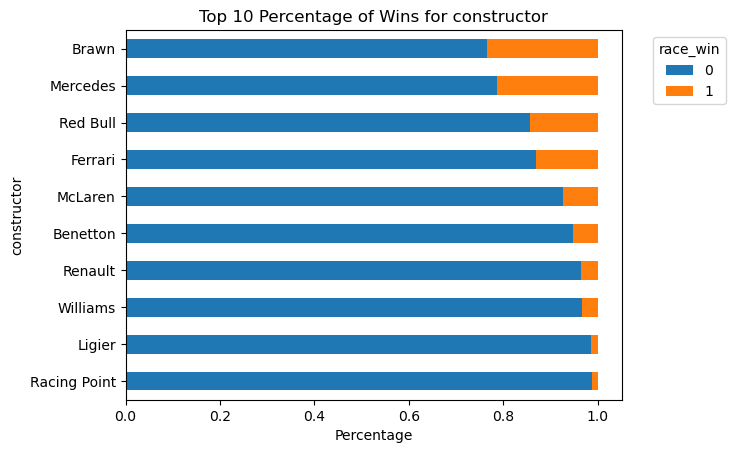

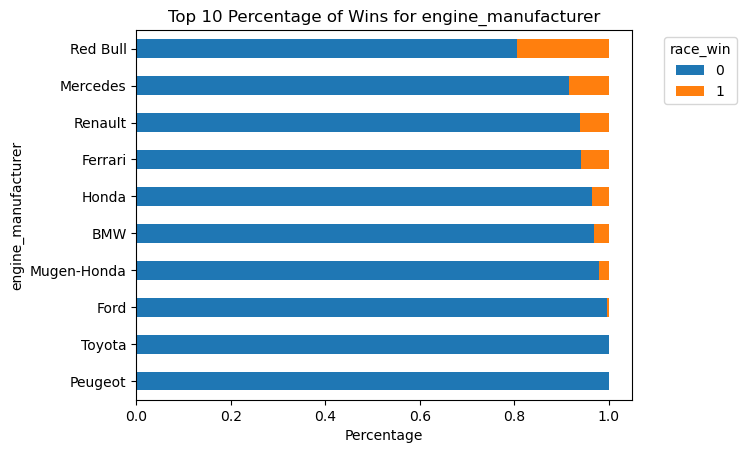

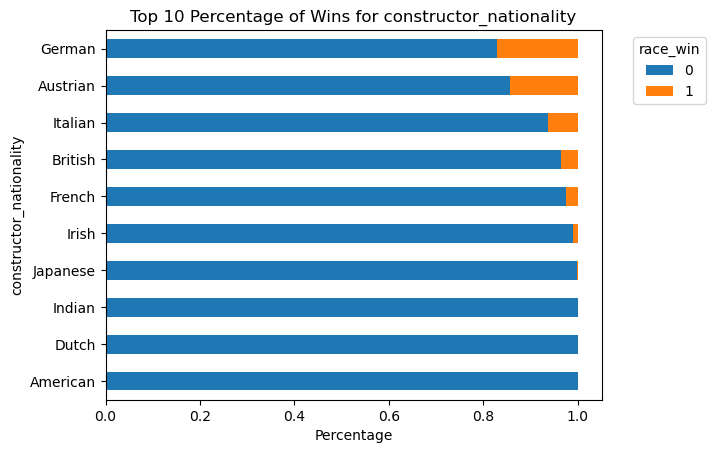

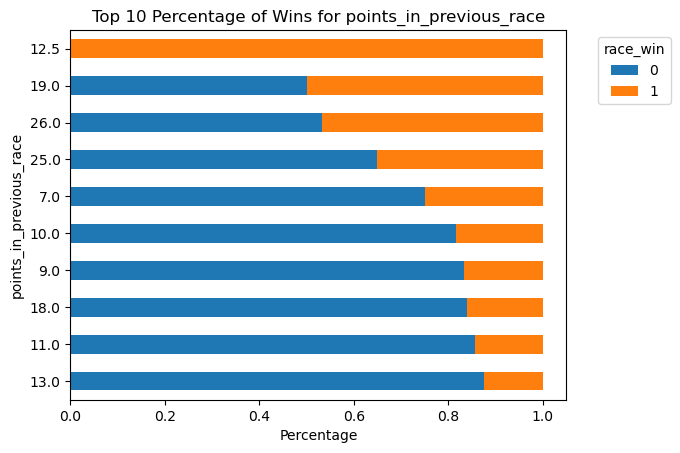

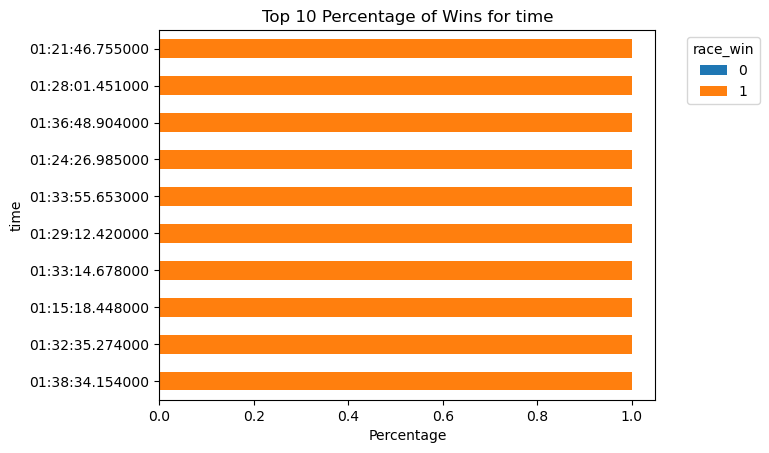

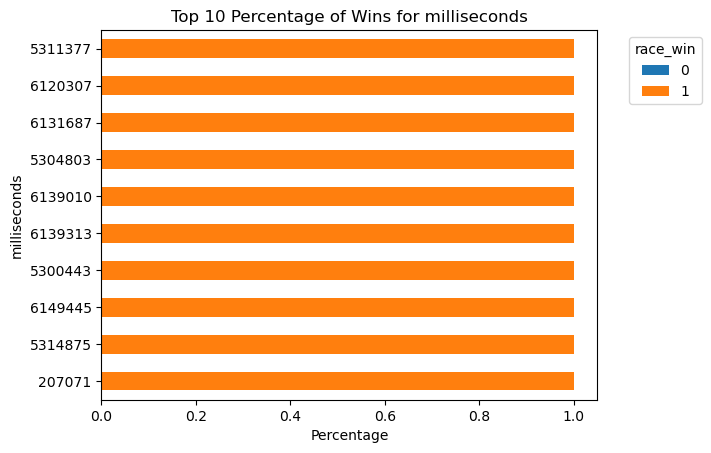

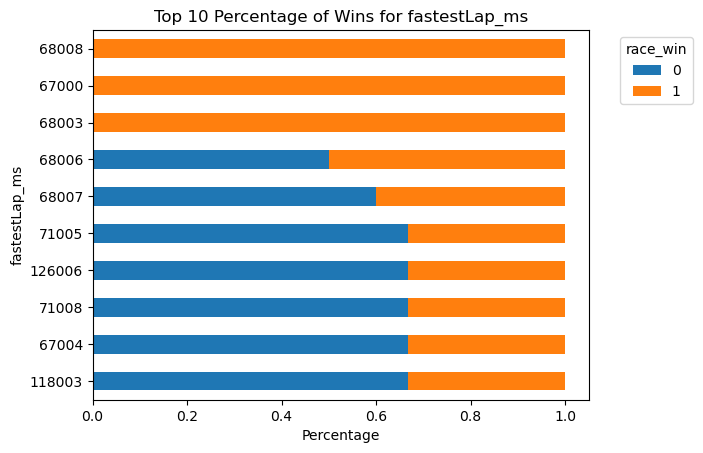

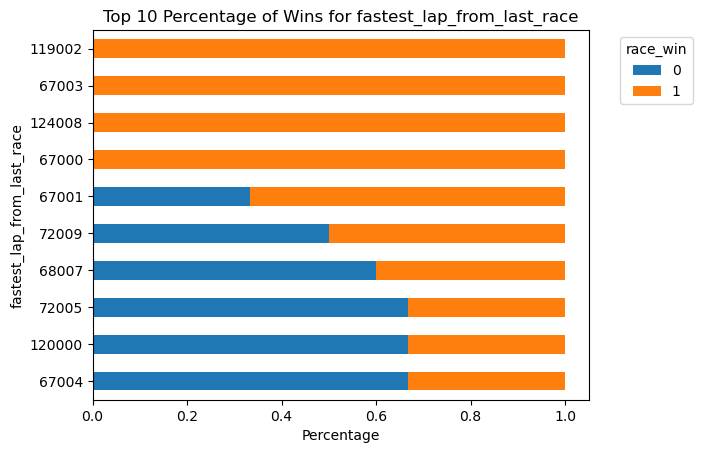

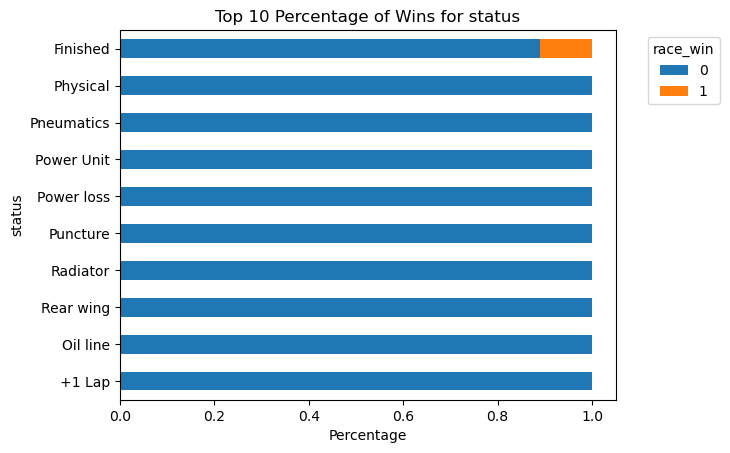

In [98]:
# First, ensure that the 'race_win' column is of a uniform type, such as 'category'.
data_analysis_df['race_win'] = data_analysis_df['race_win'].astype('category')

# Extract the column names of categorical variables
categorical_df = data_analysis_df.select_dtypes(include=['object', 'category']).columns

# Iterate over each categorical column except the last two
for column in categorical_df[:-2]:  # Exclude the last two columns directly
    
    # Group by the current column and 'race_win' and calculate the counts without sorting
    category_group_counts = data_analysis_df.groupby([column, 'race_win'], sort=False).size()
    
    # Pivot this data so that 'race_win' is unstacked to form the columns
    category_group_counts = category_group_counts.unstack('race_win').fillna(0)
    
    # Calculate totals for each category
    category_totals = category_group_counts.sum(axis=1)
    
    # Calculate the percentage of wins per category
    pct_win_cat_df = category_group_counts.div(category_totals, axis=0)
    
    # Sort the categories by winning percentage and slice the top 10
    top_categories = pct_win_cat_df[1].sort_values(ascending=False).head(10).index
    pct_win_cat_df = pct_win_cat_df.loc[top_categories]
    
    # Plot the result, with the highest winning percentage at the top
    pct_win_cat_df.sort_values(by=1, ascending=True).plot(kind='barh', stacked=True, color=['#1f77b4', '#ff7f0e'])
    plt.title(f'Top 10 Percentage of Wins for {column}')
    plt.xlabel('Percentage')
    plt.legend(title='race_win', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()



The charts illustrate the top 10 categories in various attributes related to racing data, showcasing the percentage of wins versus losses.

1. In the **"Points in Previous Race"** chart, there is an interesting stand out value here, that if a racer got 12.5 points in the previous race, they have a 100% win % in the following race. I will want to investigate this in more detail.
2. The **"Constructor Nationality"** chart shows German and Austrian constructors have the highest win percentages, indicating their strong performance.
3. For **"Engine Manufacturer"** Red Bull and Mercedes are leading, reflecting their dominance in the engine manufacturing sector of races.
4. The **"Constructor"** chart indicates that Brawn has a significantly higher win percentage compared to others like Mercedes and Red Bull, highlighting a period of dominance or success.
5. **Nationality-wise**, Dutch and British drivers have the highest win percentages, suggesting a strong presence of successful drivers from these countries.
6. Among **drivers**, Lewis Hamilton and Michael Schumacher show the highest win percentages, emphasizing their iconic status in racing.
7. The **"Nationality of Circuit"** nothing is really shown here, as there will always be a winnner at each race
8. The **"Country"** nothing is really shown here, as there will always be a winnner at each race
9. With **"Race"** nothing is really shown here, as there will always be a winnner at each race
10. For `fastest_lap_from_last_lap`, `time`, and `milliseconds`, there are a number of attributes that lead towards 100% race wins. These will need to be digged into for further analysis later.
11. **Status** shows that if you finish the race, you are more likely to win, which makes sense vs not finishing

Each chart offers insights into the factors contributing to race wins across different categories, such as the influence of nationality, individual driver performance, constructor efficiency, and the significance of the race location or circuit.

#### Bivariate Analysis - Numeric Features

In [87]:
numeric_df

,Index,resultId,raceId,year,driverId,number,F2_champion,Former_F1_World_Champion,home_race,constructorId,number.1,starting_grid_position,positionOrder,points,laps,laps_completed_in_previous_races,number_of_pit_stops,average_time_lost_in_pits,statusId,major_regulation_change
0,1,4721,240,1995,30,1,0,1,0,22,1,2,1,10.0,71,NaN,3,31.83,1,0
25,1,4724,240,1995,57,8,0,0,0,1,8,7,4,3.0,70,NaN,0,0.00,11,0
24,1,4746,240,1995,94,23,0,0,0,18,23,17,26,0.0,0,NaN,0,0.00,6,0
23,1,4745,240,1995,44,26,0,0,0,27,26,10,25,0.0,0,NaN,0,0.00,4,0
22,1,4744,240,1995,49,30,0,0,0,15,30,14,24,0.0,10,NaN,0,0.00,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11216,527,26083,1110,2023,807,27,1,0,0,210,27,0,18,0.0,44,NaN,0,0.00,1,0
11215,527,26067,1110,2023,815,11,0,0,0,9,11,2,2,18.0,44,NaN,0,0.00,1,0
11233,527,26084,1110,2023,832,55,0,0,0,6,55,4,19,0.0,23,NaN,1,23.30,130,0
11223,527,26073,1110,2023,839,31,0,0,0,214,31,14,8,4.0,44,NaN,2,23.21,1,0


In [88]:
# We need the "race_win" variable so we will add it back to our numeric dataframe
numeric_df['race_win'] = data_analysis_df['race_win']

# Check
numeric_df.head()

,Index,resultId,raceId,year,driverId,number,F2_champion,Former_F1_World_Champion,home_race,constructorId,...,starting_grid_position,positionOrder,points,laps,laps_completed_in_previous_races,number_of_pit_stops,average_time_lost_in_pits,statusId,major_regulation_change,race_win
0,1,4721,240,1995,30,1,0,1,0,22,...,2,1,10.0,71,NaN,3,31.83,1,0,1
25,1,4724,240,1995,57,8,0,0,0,1,...,7,4,3.0,70,NaN,0,0.00,11,0,0
24,1,4746,240,1995,94,23,0,0,0,18,...,17,26,0.0,0,NaN,0,0.00,6,0,0
23,1,4745,240,1995,44,26,0,0,0,27,...,10,25,0.0,0,NaN,0,0.00,4,0,0
22,1,4744,240,1995,49,30,0,0,0,15,...,14,24,0.0,10,NaN,0,0.00,10,0,0


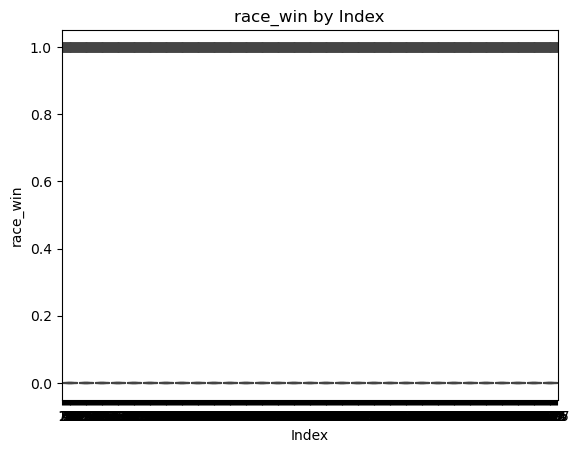

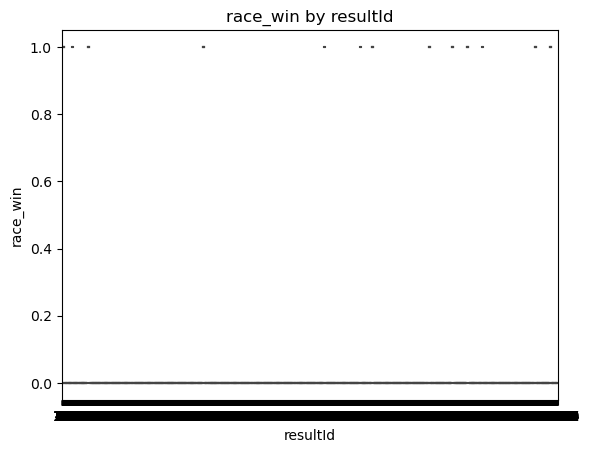

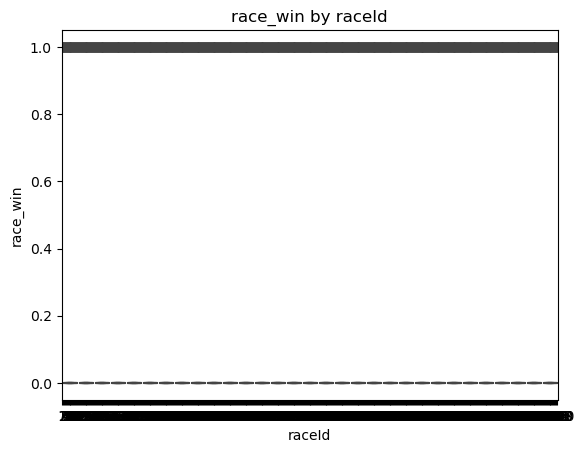

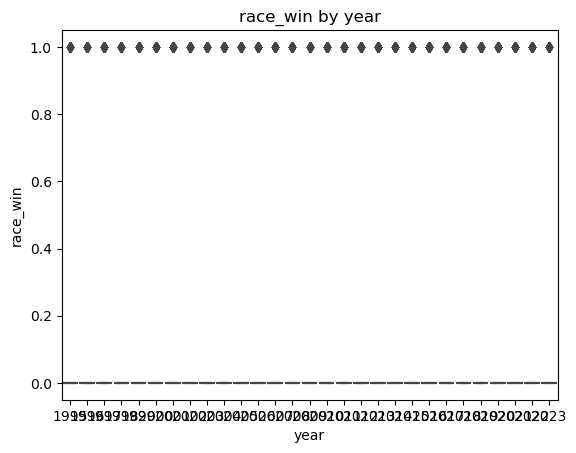

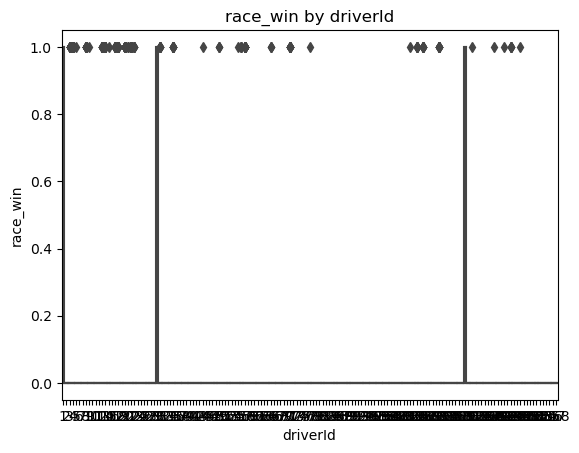

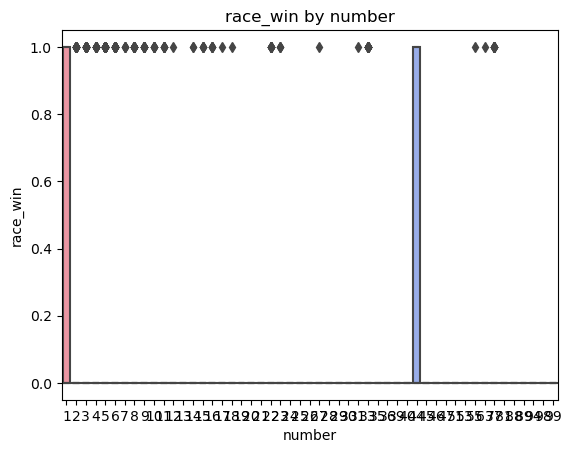

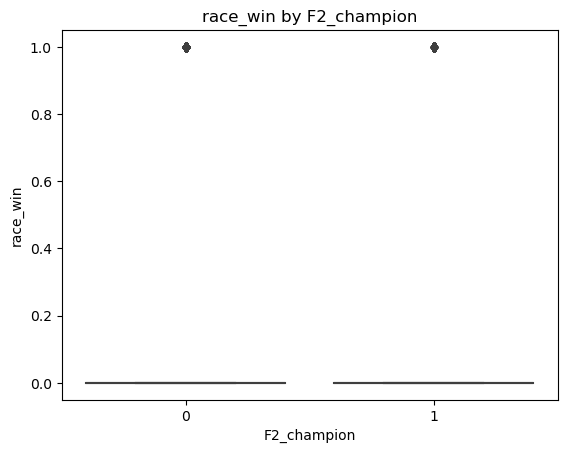

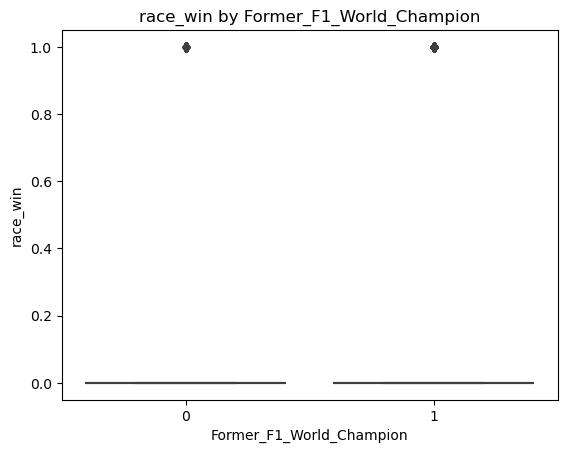

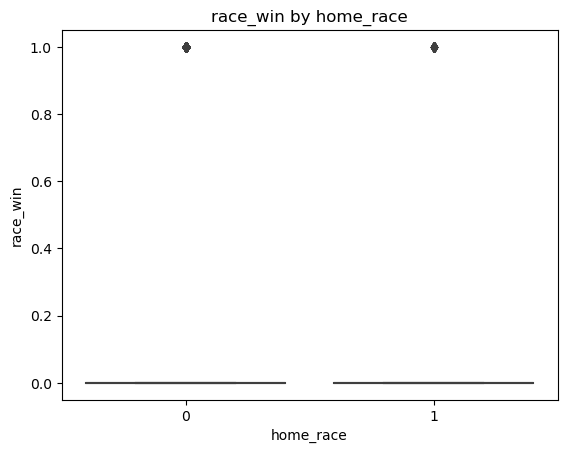

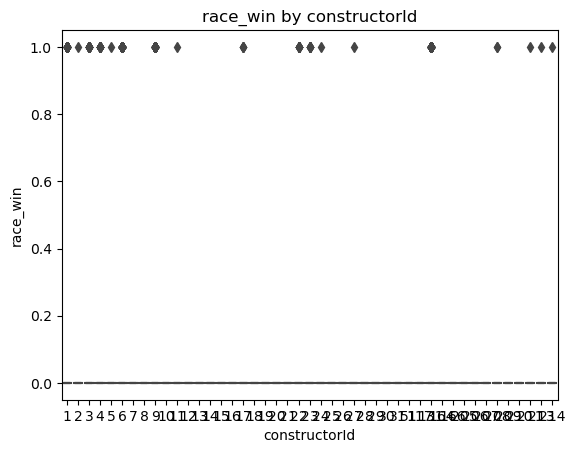

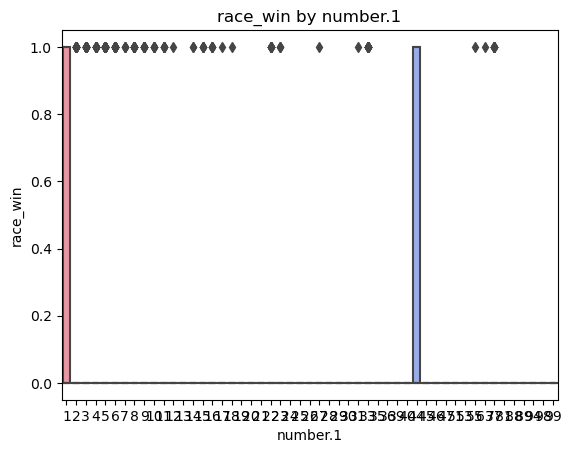

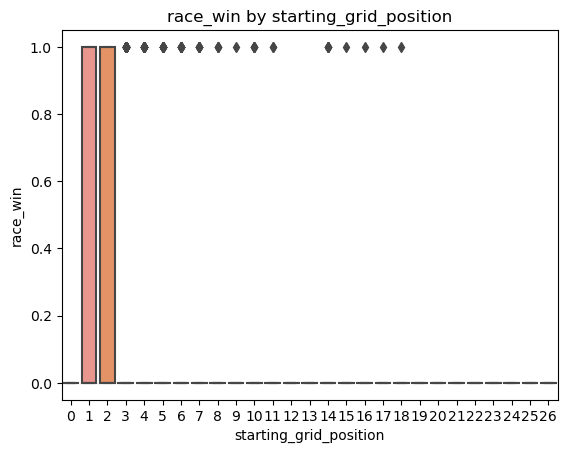

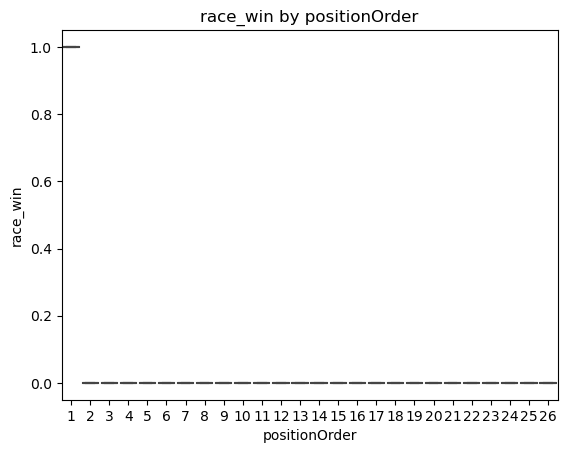

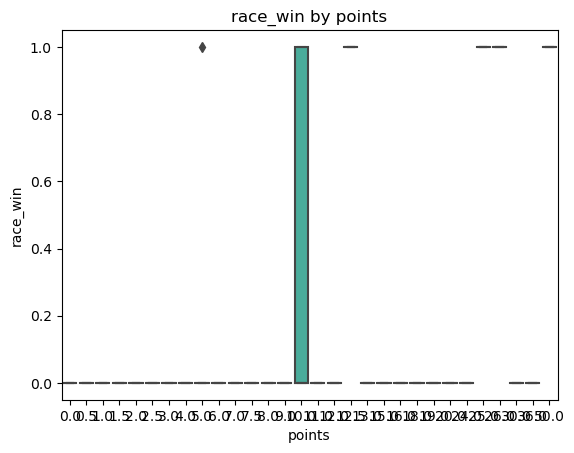

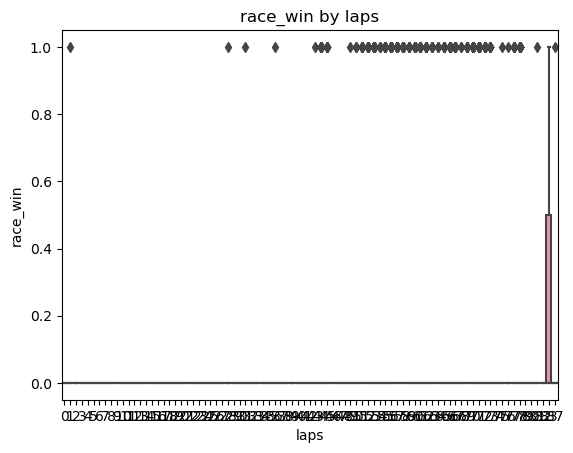

ValueError: min() arg is an empty sequence

In [89]:
# Converting the race_win column to string type so seaborn treats it as a category
for col in numeric_df.iloc[:, :-2]: 
    
    # Normalize the histogram by passing in 'stat=density' to account for differences in 
    # counts by class.
    sns.boxplot(x=col, y='race_win', data=data_analysis_df)
    plt.title(f'race_win by {col}')
    plt.show()

# 5

## Conclusion

### Insights 
State the insights/outcomes of your project or notebook.

#### Univariate Analysis Insights

**Categorical Data** The univariate analysis of the dataset reveals key insights into the Formula 1 racing domain. Categorical analysis showed;
- **McLaren**, **Williams** and **Ferrari** were the most prominent constructors in the dataset
- **German** and **British** were the most frequent driver nationalities, suggesting robust motorsports cultures in these countries. 
- **Mercedes** emerged as the most common engine manufacturer in the dataset 
- **British constructors** vastly outnumbered others, indicating possible regional biases in the sport's history or dataset compilation. 
- **Fernando Alonso's** frequent appearance underlines his prominence in the sport
- There is a high occurrence of **zero points** in previous races was observed, which points to 0 points being the most frequent output for a Formula 1 driver (per race)

**Numerical Data**
Numeric variable analysis depicted even distribution across the index, hinting at a well-spread dataset. 
- The appearance of peaks in 'resultId' and 'raceId' may signal clusters worth further investigation. 
- Variation in the 'year' frequency could correspond to different numbers of races or changes in data recording over time. 
- High frequencies in specific 'driverId' and 'constructorId' values suggest the persistence of certain drivers and teams. 
- A skewed distribution in 'F2_champion' and 'Former_F1_World_Champion' columns indicates their rarity. 
- Most races aren't home races for drivers, which could influence race dynamics. 
- 'Starting_grid_position' shows most drivers do not begin in pole positions (1-3), which makes sense as only 3 drivers can occupy those slots per race. 
- The 'positionOrder' and 'points' distributions affirm that top positions and high scores are uncommon, reflecting the competitive nature of scoring in Formula 1. 
- Lastly, the 'laps' histogram suggests a tendency for drivers to complete many laps, potentially correlating with success in races.

#### Bivariate Analysis Insights

**Categorical Data** The bivariate analysis of categorical variables in the racing data provides valuable insights into the relationships between different attributes and race outcomes, focussing on race wins:
- The analysis of `Points_in_Previous_Race` does not show a discernible trend correlating previous points with an increased chance of winning, suggesting that a driver's performance in the previous race does not strongly predict future wins.
- The `Constructor Nationality` chart reveals that **German** and **Austrian** teams have the highest win percentages, hinting at these countries' effectiveness in constructing competitive racing teams.
- When examining `Engine Manufacturer`, **Red Bull** and **Mercedes** stand out, indicating their prowess and potential competitive advantage in providing race-winning engines.
- The `Constructor` chart uncovers that **Brawn GP** enjoys a notable win rate, which may indicate a historical period of dominance or particular success during a certain timeframe.
- With regards to `driver nationalities`, **Dutch** and **British** competitors exhibit the highest win percentages, possibly reflecting the strength of their racing heritage or driver development programs.
- Focusing on `individual drivers`, the chart shows **Lewis Hamilton** and **Michael Schumacher** with remarkable win percentages, underscoring their exceptional achievements and legendary status in Formula 1.
- The `Nationality of Circuit`, `Country`, and `Race` charts do not provide significant insights since there is inherently a winner for each race, making these variables less informative in this context.

### Insights

Based on the insights from the exploratory data analysis (EDA), here are my insights and next steps for the Formula 1 race win predictor project:

1. **Feature Engineering**: Based on the insights gathered, I might look at new features that may help in predicting race wins. For instance, creating a feature that encapsulates a team's or driver's historical success rate, or how well teams have adapted to major F1 regulation changes or how well the team developed their previous year`s car, may be helpful for predicting race wins.

2. **Deeper Dive into Specific Variables**: For variables like `constructor nationality` and `engine manufacturer`, which show correlations with win rates, I may consider a deeper analysis to understand the causative factors behind these trends.

3. **Correlation Analysis**: Perform a correlation analysis to see how numerical variables like `starting_grid_position`, `points`, and `laps` correlate with race wins. This may help in selecting features for predictive modeling.

4. **Predictive Model Development**: Use the insights from univariate and bivariate analysis to inform the selection of features for a predictive model.

5. **Validation Strategy**: Plan a robust validation strategy, to ensure that your predictive model performs well on unseen data and avoids overfitting.

6. **Integration of External Data**: Consider integrating additional data sources that may have predictive power, such as weather conditions, in-season development changes, or individual driver performance metrics during practice sessions.







### Next Steps

Certainly, here are the bullet points outlining the next steps for data preprocessing and building initial logistic regression models:

#### Data Preprocessing:
- **Handling Missing Data**: Impute or remove missing values based on the insights from EDA.
- **Removing Duplicate and Drop Redundant Columns** dentify and eliminate duplicate rows to prevent skewing the model with repetitive information. Additionally, drop columns that do not contribute to the predictive power of the model or that duplicate information already captured by other features, reducing dimensionality and simplifying the model.
- **Data Cleaning**: Ensure data consistency by standardizing text and removing any irrelevant or redundant information.
- **Feature Selection**: Choose relevant features for the model based on EDA insights and correlation analysis.
- **Feature Engineering**: Create new features that could have predictive power, such as historical performance metrics.
- **Encoding Categorical Variables**: Use one-hot encoding or label encoding to convert categorical variables into a format that can be provided to the model.

#### Building Initial Logistic Regression Models:
- **Model Initialization**: Set up the initial logistic regression model with default parameters.
- **Training the Model**: Fit the logistic regression model to the training data.
- **Model Evaluation**: Assess the model's performance using appropriate metrics.
- **Interpreting Coefficients**: Analyze the model coefficients to understand the influence of each feature on race outcome predictions.
- **Iterative Refinement**: Refine the model iteratively by revisiting preprocessing steps and feature selection based on model evaluation results.
- **Model Validation**: Validate the final model on the testing set to ensure its predictive capability holds for new data.

---

# 6

## Epilogue

### References
- The original idea came from this article : https://towardsdatascience.com/formula-1-race-predictor-5d4bfae887da
- 

### Versioning
Notebook and insights by (Alex Boardman).
- Version: 1.0
- Date: 2024-03-07

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b689e16b-e36c-4f8c-b17a-b3e876352669' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>